This notebook aims to explore the [Kaggle Store Sales- Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview) data to extract insight and hidden patterns. This Dataset contians stores sales data of a, Ecuadorian grocery retialer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px


In [2]:
# Define a function to print summary of datasets:

def desc_print(title, *args):
    dash = "-"*len(title)
    print(dash, title, dash, *args , sep = "\n")

# train.csv

In [3]:
main_data = pd.read_csv("./Data/train.csv", parse_dates = ['date'] ,  index_col='id')
main_data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [4]:
print(main_data.shape)

(3000888, 5)


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [6]:
main_data.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
print("Number of dates in the main_data DataFrame:", main_data['date'].nunique())

dates = list(main_data['date'].value_counts().keys())
dates.sort()
desc_print("The last 5 days in the main_data DataFrame:", dates[-5:])

desc_print("which days do not exist in the DataFrame during 2013-01-01- 2017-08-15?")
for i in range(len(dates)-1):
    if (dates[i+1]-dates[i]).days != 1:
        print(dates[i], dates[i+1])

Number of dates in the main_data DataFrame: 1684
-------------------------------------------
The last 5 days in the main_data DataFrame:
-------------------------------------------
[Timestamp('2017-08-11 00:00:00'), Timestamp('2017-08-12 00:00:00'), Timestamp('2017-08-13 00:00:00'), Timestamp('2017-08-14 00:00:00'), Timestamp('2017-08-15 00:00:00')]
-----------------------------------------------------------------------
which days do not exist in the DataFrame during 2013-01-01- 2017-08-15?
-----------------------------------------------------------------------
2013-12-24 00:00:00 2013-12-26 00:00:00
2014-12-24 00:00:00 2014-12-26 00:00:00
2015-12-24 00:00:00 2015-12-26 00:00:00
2016-12-24 00:00:00 2016-12-26 00:00:00


In [8]:
main_data.shape[0]//1684

1782

In [9]:
print("Number of family classes:", main_data["family"].nunique())
main_data["family"].value_counts()

Number of family classes: 33


AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [10]:
main_data.groupby(['family'])['sales'].mean().sort_values(ascending=False).index

Index(['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY',
       'BREAD/BAKERY', 'POULTRY', 'MEATS', 'PERSONAL CARE', 'DELI',
       'HOME CARE', 'EGGS', 'FROZEN FOODS', 'PREPARED FOODS',
       'LIQUOR,WINE,BEER', 'SEAFOOD', 'GROCERY II', 'HOME AND KITCHEN I',
       'HOME AND KITCHEN II', 'CELEBRATION', 'LINGERIE', 'LADIESWEAR',
       'PLAYERS AND ELECTRONICS', 'AUTOMOTIVE', 'LAWN AND GARDEN',
       'PET SUPPLIES', 'BEAUTY', 'SCHOOL AND OFFICE SUPPLIES', 'MAGAZINES',
       'HARDWARE', 'HOME APPLIANCES', 'BABY CARE', 'BOOKS'],
      dtype='object', name='family')

In [11]:
family_list_sorted = list(main_data.groupby(['family'])['sales'].mean().sort_values(ascending=False).index)
family_list_sorted

['GROCERY I',
 'BEVERAGES',
 'PRODUCE',
 'CLEANING',
 'DAIRY',
 'BREAD/BAKERY',
 'POULTRY',
 'MEATS',
 'PERSONAL CARE',
 'DELI',
 'HOME CARE',
 'EGGS',
 'FROZEN FOODS',
 'PREPARED FOODS',
 'LIQUOR,WINE,BEER',
 'SEAFOOD',
 'GROCERY II',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'CELEBRATION',
 'LINGERIE',
 'LADIESWEAR',
 'PLAYERS AND ELECTRONICS',
 'AUTOMOTIVE',
 'LAWN AND GARDEN',
 'PET SUPPLIES',
 'BEAUTY',
 'SCHOOL AND OFFICE SUPPLIES',
 'MAGAZINES',
 'HARDWARE',
 'HOME APPLIANCES',
 'BABY CARE',
 'BOOKS']

In [12]:
print("Number of stores in the main_data DataFrame:" ,main_data["store_nbr"].nunique())
main_data["store_nbr"].value_counts()

Number of stores in the main_data DataFrame: 54


1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64

In [13]:
main_data["date"].nunique() * main_data["store_nbr"].nunique() * main_data["family"].nunique() ==main_data.shape[0]

True

In [14]:
data_type_dict = {"store_nbr": "category", "family" :"category"}
main_data = main_data.astype(data_type_dict)

In [15]:
main_data.describe()

,sales,onpromotion
count,3.000888e+06,3.000888e+06
mean,3.577757e+02,2.602770e+00
std,1.101998e+03,1.221888e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.100000e+01,0.000000e+00
75%,1.958473e+02,0.000000e+00
max,1.247170e+05,7.410000e+02


# test.csv

In [16]:
test_data = pd.read_csv("./Data/test.csv",  index_col='id', parse_dates = ['date'] )
test_data.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 3000888 to 3029399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28512 non-null  datetime64[ns]
 1   store_nbr    28512 non-null  int64         
 2   family       28512 non-null  object        
 3   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [18]:
desc_print("Number of dates in the test_data DataFrame:", test_data['date'].nunique())

dates = list(test_data['date'].value_counts().keys())
dates.sort()
desc_print("The last 5 days in the test_data DataFrame:", dates[-5:])

desc_print("which days do not exist in the DataFrame during 2017-08-16- 2017-08-31?")
j = True
for i in range(len(dates)-1):
    if (dates[i+1]-dates[i]).days != 1:
        print(dates[i], dates[i+1])
        j = False
if j:
    print("All days existed")
    
    

-------------------------------------------
Number of dates in the test_data DataFrame:
-------------------------------------------
16
-------------------------------------------
The last 5 days in the test_data DataFrame:
-------------------------------------------
[Timestamp('2017-08-27 00:00:00'), Timestamp('2017-08-28 00:00:00'), Timestamp('2017-08-29 00:00:00'), Timestamp('2017-08-30 00:00:00'), Timestamp('2017-08-31 00:00:00')]
-----------------------------------------------------------------------
which days do not exist in the DataFrame during 2017-08-16- 2017-08-31?
-----------------------------------------------------------------------
All days existed


In [19]:
test_data = test_data.astype(data_type_dict)

In [20]:
test_data["date"].nunique() * test_data["store_nbr"].nunique() * test_data["family"].nunique() == test_data.shape[0]

True

# oil.csv

In [21]:
oil_data = pd.read_csv("./Data/oil.csv", parse_dates= ["date"])
oil_data.head(20)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [22]:
oil_data.shape

(1218, 2)

In [23]:
print("max date:", oil_data['date'].max(), "min date:", oil_data.min())

max date: 2017-08-31 00:00:00 min date: date          2013-01-01 00:00:00
dcoilwtico                  26.19
dtype: object


In [24]:
oil_date = list(oil_data["date"].unique())
oil_date.sort()
print(oil_date[:3])
print(oil_date[-3:])

[numpy.datetime64('2013-01-01T00:00:00.000000000'), numpy.datetime64('2013-01-02T00:00:00.000000000'), numpy.datetime64('2013-01-03T00:00:00.000000000')]
[numpy.datetime64('2017-08-29T00:00:00.000000000'), numpy.datetime64('2017-08-30T00:00:00.000000000'), numpy.datetime64('2017-08-31T00:00:00.000000000')]


In [25]:
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [26]:
#since for weekend holidays,oil price was not recorded , we will fill the nan values with the next avalable value.
oil_data.fillna(method = "backfill", inplace = True)
oil_data

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


# holidays_events.csv

In [27]:

holiday_data = pd.read_csv("./Data/holidays_events.csv", parse_dates= ["date"])
holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [28]:
print(holiday_data.date.min(), holiday_data.date.max())

2012-03-02 00:00:00 2017-12-26 00:00:00


In [29]:
holiday_data['type'] = np.where(holiday_data['transferred'] == True,'Transferred', holiday_data['type'])

holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [30]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-es-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

def translate_text(text):
    input_ids = tokenizer.encode(text, return_tensors="pt")
    translation = model.generate(input_ids, max_length=50, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)
    return translated_text




c:\Users\solmaz\anaconda3\envs\DS\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [31]:
holiday_data['desc_en'] = holiday_data['description'].apply(translate_text)

In [32]:
holiday_data.head(50)

,date,type,locale,locale_name,description,transferred,desc_en
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,Foundation of Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Provincialization of Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,Cantonization of Freedom
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,Cantonization of Riobamba
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False,Cantonization of Puyo
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,Cantonization of Guaranda
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Provincialization of Imbabura
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,Cantonization of Latacunga
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False,Foundation of Machala


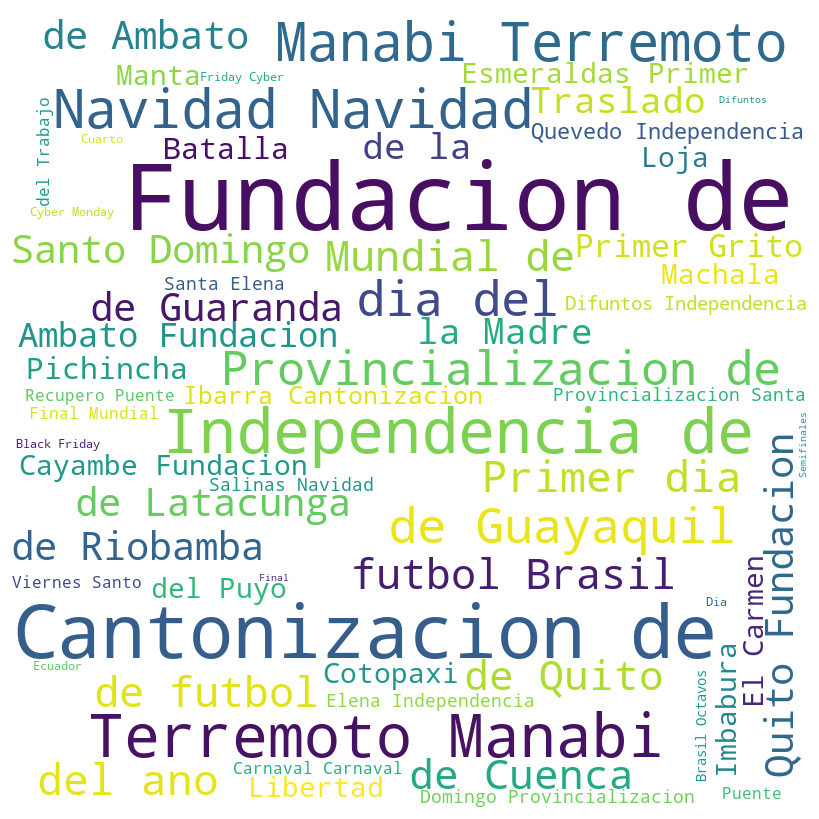

In [33]:
from wordcloud import WordCloud
#from nltk.corpus import stopwords
#import spacy


text = " ".join(review for review in holiday_data["description"])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords.words("english"),
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [34]:
holiday_data.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
desc_en        0
dtype: int64

In [35]:
holiday_data.type.value_counts()

Holiday        209
Event           56
Additional      51
Transferred     12
Transfer        12
Bridge           5
Work Day         5
Name: type, dtype: int64

In [36]:
wd = holiday_data[holiday_data.date.dt.year.eq(2013)]

wd["weekday"] = wd["date"].apply(lambda x : x.day_name()).astype("category")
wd

C:\Users\solmaz\AppData\Local\Temp\ipykernel_10760\886860040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd["weekday"] = wd["date"].apply(lambda x : x.day_name()).astype("category")


,date,type,locale,locale_name,description,transferred,desc_en,weekday
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,First day of the year,Tuesday
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,I recover bridge Christmas,Saturday
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,I recover bridge first day of the anus,Saturday
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,Carnival,Monday
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False,Carnival,Tuesday
46,2013-03-02,Holiday,Local,Manta,Fundacion de Manta,False,Foundation of Manta,Saturday
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Provincialization of Cotopaxi,Monday
48,2013-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,Fundacion de Cuenca,Friday
49,2013-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,Cantonization of Freedom,Sunday
50,2013-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,Cantonization of Riobamba,Sunday


In [37]:
main_data[main_data['date'] == '2013-01-05 00:00:00']

,date,store_nbr,family,sales,onpromotion
id,,,,,
7128,2013-01-05,1,AUTOMOTIVE,5.000,0
7129,2013-01-05,1,BABY CARE,0.000,0
7130,2013-01-05,1,BEAUTY,3.000,0
7131,2013-01-05,1,BEVERAGES,1160.000,0
7132,2013-01-05,1,BOOKS,0.000,0
...,...,...,...,...,...
8905,2013-01-05,9,POULTRY,510.919,0
8906,2013-01-05,9,PREPARED FOODS,84.000,0
8907,2013-01-05,9,PRODUCE,0.000,0


In [38]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
 6   desc_en      350 non-null    object        
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 16.9+ KB


In [39]:
holiday_datatypes = {"type": "category","locale":"category", "locale_name": "category", "description": "string"}
holiday_data = holiday_data.astype(holiday_datatypes)
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    category      
 2   locale       350 non-null    category      
 3   locale_name  350 non-null    category      
 4   description  350 non-null    string        
 5   transferred  350 non-null    bool          
 6   desc_en      350 non-null    object        
dtypes: bool(1), category(3), datetime64[ns](1), object(1), string(1)
memory usage: 10.9+ KB


Let's check the values in the date column are unique or not:

In [40]:
holiday_data['date'].nunique()== holiday_data.shape[0]

False

In [41]:
holiday_data['date'].value_counts()

2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
             ..
2014-07-13    1
2014-07-12    1
2014-07-09    1
2014-07-08    1
2017-12-26    1
Name: date, Length: 312, dtype: int64

In [42]:
holiday_data[holiday_data["date"]=='2014-06-25 00:00:00']

,date,type,locale,locale_name,description,transferred,desc_en
110,2014-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,Cantonization of Latacunga
111,2014-06-25,Holiday,Local,Machala,Fundacion de Machala,False,Foundation of Machala
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Provincialization of Imbabura
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False,World Cup Brazil: Ecuador-France


Some dates were repeated in the `holiday_data` dataframe and it seems the it is related to the `locale_name` feature. It seems some holidays are celebrated under different titles in some cities or states. We will handle this issue later (after we load the stores dataset).

Let's try to find out more about type of holiday and locale features.

In [43]:
holiday_data.groupby(['type', 'locale',])["date"].count().reset_index()

,type,locale,date
0,Additional,Local,11
1,Additional,National,40
2,Additional,Regional,0
3,Bridge,Local,0
4,Bridge,National,5
5,Bridge,Regional,0
6,Event,Local,0
7,Event,National,56
8,Event,Regional,0
9,Holiday,Local,133


In [44]:
holiday_data.groupby(['locale', 'locale_name'])["date"].count().reset_index()

,locale,locale_name,date
0,Local,Ambato,12
1,Local,Cayambe,6
2,Local,Cotopaxi,0
3,Local,Cuenca,7
4,Local,Ecuador,0
...,...,...,...
67,Regional,Riobamba,0
68,Regional,Salinas,0
69,Regional,Santa Elena,6
70,Regional,Santo Domingo,0


# stores.csv

In [45]:
stores_data = pd.read_csv("./Data/stores.csv")
stores_data

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [46]:

desc_print(f"Number of cities in the store_data dataset:{stores_data['city'].nunique()}", stores_data['city'].value_counts())

desc_print(f"Number of states in the store_data dataset:{ stores_data['state'].nunique()}", stores_data['state'].value_counts())

desc_print(f"Number of types in the store_data dataset: {stores_data['type'].nunique()}", stores_data['type'].value_counts())

desc_print(f"Number of clusters in the store_data dataset: {stores_data['cluster'].nunique()}", stores_data['cluster'].value_counts())

---------------------------------------------
Number of cities in the store_data dataset:22
---------------------------------------------
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64
---------------------------------------------
Number of states in the store_data dataset:16
---------------------------------------------
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2


In [47]:
stores_data = stores_data.astype("category")
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     category
 1   city       54 non-null     category
 2   state      54 non-null     category
 3   type       54 non-null     category
 4   cluster    54 non-null     category
dtypes: category(5)
memory usage: 5.1 KB


## Stores data & holiday data

In [48]:
holiday_data['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [49]:
holiday_local  = holiday_data[holiday_data["locale"]== "Local"].copy()

city_set = set(stores_data.city.unique())

set(holiday_local.locale_name).difference(city_set)


set()

In [50]:
holiday_local.rename(columns={'locale_name': 'city'}, inplace=True)


In [51]:
holiday_local[holiday_local.duplicated(subset=['date', 'city'], keep=False)]

,date,type,locale,city,description,transferred,desc_en
264,2016-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False,Foundation of Guayaquil-1
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False,Transfer Foundation of Guayaquil


In [52]:
holiday_local= holiday_local.drop_duplicates(subset=['date', 'city'])


In [53]:
holiday_local[holiday_local.duplicated(subset=['date', 'city'], keep=False)]

,date,type,locale,city,description,transferred,desc_en


It seems all values of `locale_name` in the `holiday_local` datafram are the name of associated cities.

In [54]:
holiday_regional  = holiday_data[holiday_data["locale"]== "Regional"].copy()

state_set = set(stores_data.state.unique())

set(holiday_regional.locale_name).difference(state_set)

set()

In [55]:
holiday_regional

,date,type,locale,locale_name,description,transferred,desc_en
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Provincialization of Cotopaxi
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Provincialization of Imbabura
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False,Provincialization of Santo Domingo
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False,Provincialization St. Helena
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Provincialization of Cotopaxi
58,2013-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Provincialization of Imbabura
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False,Provincialization of Santo Domingo
77,2013-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False,Provincialization St. Helena
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,Provincialization of Cotopaxi
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Provincialization of Imbabura


In [56]:
holiday_regional.rename(columns={'locale_name': 'state'}, inplace=True)
holiday_regional= holiday_regional.drop_duplicates(subset=['date', 'state'])

The same sitution is held for `holiday_regional` frame too.

In [57]:
holiday_national = holiday_data[holiday_data["locale"]== "National"].copy()
holiday_national

,date,type,locale,locale_name,description,transferred,desc_en
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,First Cry of Independence
19,2012-10-09,Transferred,National,Ecuador,Independencia de Guayaquil,True,Independence of Guayaquil
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,Transfer Independence of Guayaquil
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,Day of the Dead
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,Independence of Cuenca
...,...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False,Christmas-3
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False,Christmas-2
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False,Christmas-1
348,2017-12-25,Holiday,National,Ecuador,Navidad,False,Christmas


In [58]:
holiday_regional= holiday_regional.drop_duplicates(subset=['date'])

# transactions.csv

In [59]:
trans_data = pd.read_csv("./Data/transactions.csv", parse_dates= ['date'])
trans_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [60]:
trans_data.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [61]:
print(main_data["date"].nunique()- trans_data["date"].nunique())

for i in set(main_data['date'].unique()) - set(trans_data["date"].unique()):
    print(i)

2
2016-01-01T00:00:00.000000000
2016-01-03T00:00:00.000000000


In [62]:
trans_date = list(trans_data["date"].unique())
trans_date.sort()
print(trans_date[:5])
print(trans_date[-5:])

[numpy.datetime64('2013-01-01T00:00:00.000000000'), numpy.datetime64('2013-01-02T00:00:00.000000000'), numpy.datetime64('2013-01-03T00:00:00.000000000'), numpy.datetime64('2013-01-04T00:00:00.000000000'), numpy.datetime64('2013-01-05T00:00:00.000000000')]
[numpy.datetime64('2017-08-11T00:00:00.000000000'), numpy.datetime64('2017-08-12T00:00:00.000000000'), numpy.datetime64('2017-08-13T00:00:00.000000000'), numpy.datetime64('2017-08-14T00:00:00.000000000'), numpy.datetime64('2017-08-15T00:00:00.000000000')]


Note that transaction data can not be used for forecasting. It just gives us insight of purchase behaviours of customers.

# Merging frames

In [63]:
df = main_data.merge(oil_data, on = "date", how = "left").fillna(method = 'ffill')
df = df.merge(stores_data, on = "store_nbr", how = "left", )
df = df.merge(trans_data, on = ["date", "store_nbr"], how = "left")
df = df.merge(holiday_local, on = ["date", "city"], how = "left", suffixes= ("_store", "_holiday")) 
df = df.merge(holiday_regional, on = ["date", "state"], how = "left",)
df = df.merge(holiday_national, on ="date", how = "left")


df

c:\Users\solmaz\anaconda3\envs\DS\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
c:\Users\solmaz\anaconda3\envs\DS\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,...,locale_y,description_y,transferred_y,desc_en_y,type_y,locale,locale_name,description,transferred,desc_en
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,...,NaN,<NA>,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,First day of the year
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,...,NaN,<NA>,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,First day of the year
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,...,NaN,<NA>,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,First day of the year
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,...,NaN,<NA>,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,First day of the year
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,...,NaN,<NA>,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,First day of the year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
3008012,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
3008013,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
3008014,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


In [64]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'city', 'state', 'type_store', 'cluster', 'transactions',
       'type_holiday', 'locale_x', 'description_x', 'transferred_x',
       'desc_en_x', 'type_x', 'locale_y', 'description_y', 'transferred_y',
       'desc_en_y', 'type_y', 'locale', 'locale_name', 'description',
       'transferred', 'desc_en'],
      dtype='object')

In [65]:
type_holiday = df['type_holiday'].combine_first(df['type_x']).combine_first(df['type_y'])
locale = df['locale_x'].combine_first(df['locale_y']).combine_first(df['locale'])
transferred =  df['transferred_x'].combine_first(df['transferred_y']).combine_first(df['transferred'])



In [66]:
locale.value_counts()

National    261459
Local        12243
Regional      1023
Name: locale_x, dtype: int64

In [67]:
df = df.iloc[:, :11]
df

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,NaN
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,NaN
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,NaN
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,NaN
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3008011,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2155.0
3008012,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2155.0
3008013,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2155.0
3008014,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2155.0


In [68]:
df['type_holiday']= type_holiday
df['locale']= locale
df['transferred'] = transferred

## Check everything in merging process went all right or not

In [69]:
df[df['locale']=='Local']

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,type_holiday,locale,transferred
108471,2013-03-02,52,AUTOMOTIVE,0.000,0,90.71,Manta,Manabi,A,11,NaN,Holiday,Local,False
108472,2013-03-02,52,BABY CARE,0.000,0,90.71,Manta,Manabi,A,11,NaN,Holiday,Local,False
108473,2013-03-02,52,BEAUTY,0.000,0,90.71,Manta,Manabi,A,11,NaN,Holiday,Local,False
108474,2013-03-02,52,BEVERAGES,0.000,0,90.71,Manta,Manabi,A,11,NaN,Holiday,Local,False
108475,2013-03-02,52,BOOKS,0.000,0,90.71,Manta,Manabi,A,11,NaN,Holiday,Local,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006427,2017-08-15,14,POULTRY,50.337,1,47.57,Riobamba,Chimborazo,C,7,1241.0,Holiday,Local,False
3006428,2017-08-15,14,PREPARED FOODS,107.000,0,47.57,Riobamba,Chimborazo,C,7,1241.0,Holiday,Local,False
3006429,2017-08-15,14,PRODUCE,551.648,88,47.57,Riobamba,Chimborazo,C,7,1241.0,Holiday,Local,False
3006430,2017-08-15,14,SCHOOL AND OFFICE SUPPLIES,4.000,3,47.57,Riobamba,Chimborazo,C,7,1241.0,Holiday,Local,False


In [70]:
df[(df["date"]=='2014-06-25 00:00:00') & (df['locale']=='Local')]

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,type_holiday,locale,transferred
960597,2014-06-25,12,AUTOMOTIVE,2.000,0,107.04,Latacunga,Cotopaxi,C,15,1242.0,Holiday,Local,False
960598,2014-06-25,12,BABY CARE,0.000,0,107.04,Latacunga,Cotopaxi,C,15,1242.0,Holiday,Local,False
960599,2014-06-25,12,BEAUTY,1.000,0,107.04,Latacunga,Cotopaxi,C,15,1242.0,Holiday,Local,False
960600,2014-06-25,12,BEVERAGES,654.000,0,107.04,Latacunga,Cotopaxi,C,15,1242.0,Holiday,Local,False
960601,2014-06-25,12,BOOKS,0.000,0,107.04,Latacunga,Cotopaxi,C,15,1242.0,Holiday,Local,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961681,2014-06-25,41,POULTRY,170.074,1,107.04,Machala,El Oro,D,4,1004.0,Holiday,Local,False
961682,2014-06-25,41,PREPARED FOODS,64.788,0,107.04,Machala,El Oro,D,4,1004.0,Holiday,Local,False
961683,2014-06-25,41,PRODUCE,17.000,1,107.04,Machala,El Oro,D,4,1004.0,Holiday,Local,False
961684,2014-06-25,41,SCHOOL AND OFFICE SUPPLIES,0.000,0,107.04,Machala,El Oro,D,4,1004.0,Holiday,Local,False


In [71]:
holiday_data[holiday_data['date']== '2014-06-25 00:00:00']

,date,type,locale,locale_name,description,transferred,desc_en
110,2014-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,Cantonization of Latacunga
111,2014-06-25,Holiday,Local,Machala,Fundacion de Machala,False,Foundation of Machala
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Provincialization of Imbabura
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False,World Cup Brazil: Ecuador-France


## Imputing missing values

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008016 entries, 0 to 3008015
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        category      
 3   sales         float64       
 4   onpromotion   int64         
 5   dcoilwtico    float64       
 6   city          object        
 7   state         object        
 8   type_store    category      
 9   cluster       category      
 10  transactions  float64       
 11  type_holiday  category      
 12  locale        category      
 13  transferred   object        
dtypes: category(5), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 243.8+ MB


In [73]:
df.isnull().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
city                  0
state                 0
type_store            0
cluster               0
transactions     246081
type_holiday    2733291
locale          2733291
transferred     2733291
dtype: int64

In [74]:
df.locale.unique()

['National', NaN, 'Local', 'Regional']
Categories (3, object): ['Local', 'National', 'Regional']

In [75]:
df['type_holiday'] = df['type_holiday'].cat.add_categories("IsNotHoliday")  
df['locale'] = df['locale'].cat.add_categories("IsNotHoliday") 

fill_values = {"type_holiday" :"IsNotHoliday", "locale":"IsNotHoliday"}
df.fillna(fill_values, inplace = True)

C:\Users\solmaz\AppData\Local\Temp\ipykernel_10760\933021475.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(fill_values, inplace = True)


In [76]:
df.fillna({"transferred": False, "transactions": 0}, inplace = True)
df.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
city            0
state           0
type_store      0
cluster         0
transactions    0
type_holiday    0
locale          0
transferred     0
dtype: int64

## Extracting date features

In [77]:
df['year'] = df["date"].apply(lambda x: x.year)
df['month'] = df["date"].apply(lambda x: x.month)
df['day'] = df["date"].apply(lambda x : x.day)
df['dayweek'] = df["date"].apply(lambda x : x.day_name()).astype("category")
df["quarter"] = df["date"].apply(lambda x: x.quarter)
df["weekyear"]= df["date"].apply(lambda x: x.weekofyear)
df["isweekend"] = df["date"].dt.dayofweek // 5 

df.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,...,type_holiday,locale,transferred,year,month,day,dayweek,quarter,weekyear,isweekend
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,...,Holiday,National,False,2013,1,1,Tuesday,1,1,0
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,...,Holiday,National,False,2013,1,1,Tuesday,1,1,0
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,...,Holiday,National,False,2013,1,1,Tuesday,1,1,0
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,...,Holiday,National,False,2013,1,1,Tuesday,1,1,0
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,...,Holiday,National,False,2013,1,1,Tuesday,1,1,0


In [78]:
# Seasons in Ecuador :Dry season : october- May, wet season : Jun-Septamber
def season(x):
    if 6<= x <=9:
        return 'W'
    else:
        return "D"
df['season'] = df['month'].apply(season)

df

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,...,locale,transferred,year,month,day,dayweek,quarter,weekyear,isweekend,season
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,...,National,False,2013,1,1,Tuesday,1,1,0,D
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,...,National,False,2013,1,1,Tuesday,1,1,0,D
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,...,National,False,2013,1,1,Tuesday,1,1,0,D
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,...,National,False,2013,1,1,Tuesday,1,1,0,D
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,...,National,False,2013,1,1,Tuesday,1,1,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,...,IsNotHoliday,False,2017,8,15,Tuesday,3,33,0,W
3008012,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,...,IsNotHoliday,False,2017,8,15,Tuesday,3,33,0,W
3008013,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,...,IsNotHoliday,False,2017,8,15,Tuesday,3,33,0,W
3008014,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,...,IsNotHoliday,False,2017,8,15,Tuesday,3,33,0,W


# Exploratory Data Analysis

## Summary of dataset

In [ ]:
desc_print("Summary of dataset",
f"Number of days in train dataset : {df.date.nunique()} from {df.date.min().date()} to {df.date.max().date()}",
f"Number of days in test dataset : {test_data.date.nunique()} from {test_data.date.min().date()} to {test_data.date.max().date()}",
f"Number of products' categories : {df.family.nunique()}",
f"Number of stores :  {df.store_nbr.nunique()}",
f"Number of types of days : {df.type_holiday.nunique()}",
f"Numbner of target series : {df.family.nunique() * df.store_nbr.nunique()}",
f"Numbner of cities : {df.city.nunique()}",
f"Numbner of states : {df.state.nunique()}",
)

------------------
Summary of dataset
------------------
Number of days in train dataset : 1684 from 2013-01-01 to 2017-08-15
Number of days in test dataset : 16 from 2017-08-16 to 2017-08-31
Number of products' categories : 33
Number of stores :  54
Number of types of days : 7
Numbner of target series : 1782
Numbner of cities : 22
Numbner of states : 16


In [170]:
# Do all stores sell all families of products?:

df_store_family = df.groupby(["store_nbr", "family"])["sales"].sum().reset_index()

df_store_family[df_store_family["sales"]==0]



,store_nbr,family,sales
1,1,BABY CARE,0.0
268,9,BOOKS,0.0
301,10,BOOKS,0.0
334,11,BOOKS,0.0
367,12,BOOKS,0.0
397,13,BABY CARE,0.0
400,13,BOOKS,0.0
433,14,BOOKS,0.0
449,14,LAWN AND GARDEN,0.0
466,15,BOOKS,0.0


From the above output, we deduce that store 1 does not sell any item in "BABY CARE" category, and so on. So, we will expect the model can predict this pattern very well.

In [171]:
df.describe()

,store_nbr,sales,onpromotion,dcoilwtico,transactions,year,month,day,quarter,weekyear,isweekend
count,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06,3.008016e+06
mean,2.750000e+01,3.582691e+02,2.609620e+00,6.786014e+01,1.556796e+03,2.014839e+03,6.209123e+00,1.561789e+01,2.410545e+00,2.524526e+01,2.867299e-01
std,1.558579e+01,1.103511e+03,1.226308e+01,2.566327e+01,1.034181e+03,1.344969e+00,3.384974e+00,8.799659e+00,1.099465e+00,1.479494e+01,4.522344e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,4.632000e+01,9.300000e+02,2.014000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.300000e+01,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00,5.333000e+01,1.331000e+03,2.015000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.500000e+01,0.000000e+00
75%,4.100000e+01,1.960000e+02,0.000000e+00,9.571250e+01,1.978000e+03,2.016000e+03,9.000000e+00,2.300000e+01,3.000000e+00,3.800000e+01,1.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,8.359000e+03,2.017000e+03,1.200000e+01,3.100000e+01,4.000000e+00,5.300000e+01,1.000000e+00


## Relationship between sales, city and family features

We are going to answer questions like:
1. How much is the mean of sales in each category of products?
2. Does the city feature influence the relationship between sales and the category of products? In other words, does the city has an interaction effect on the relationship between sale and category?
3. What are the most popular products in each city?

Text(0.5, 1.0, 'Mean of sales in each category of products')

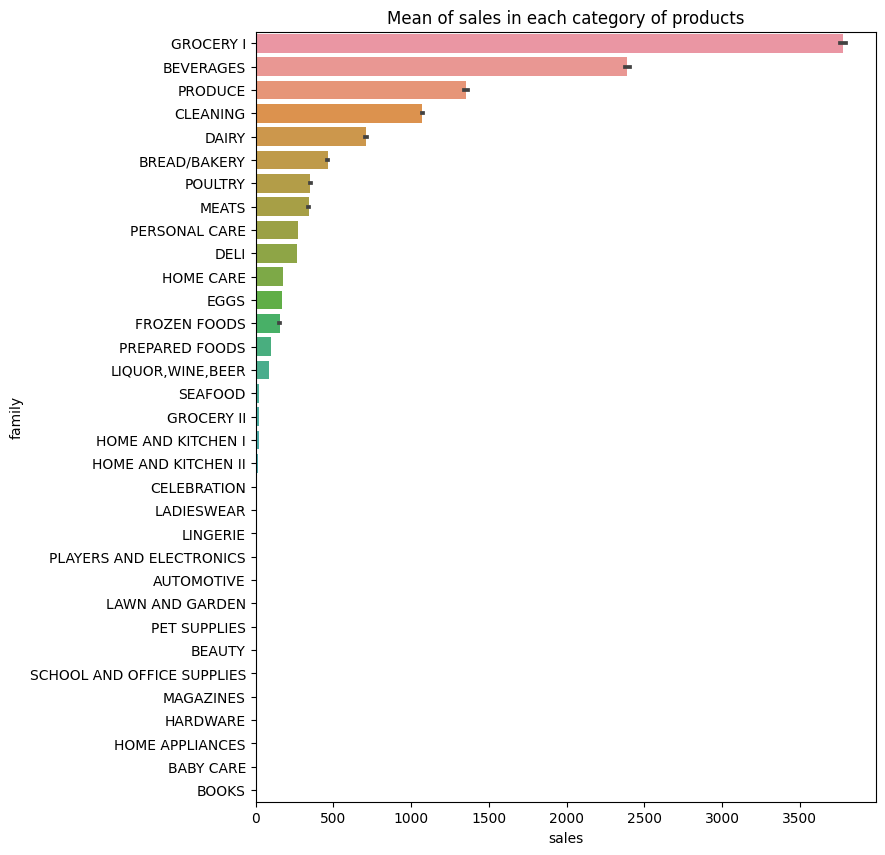

In [65]:
plt.figure(figsize=(8,10))

sns.barplot(data=df, y="family", x='sales',  order=df.groupby('family')['sales'].mean().sort_values(ascending=False).index)

plt.title("Mean of sales in each category of products")

Text(0.5, 1.0, 'Mean of grocery sales in each city')

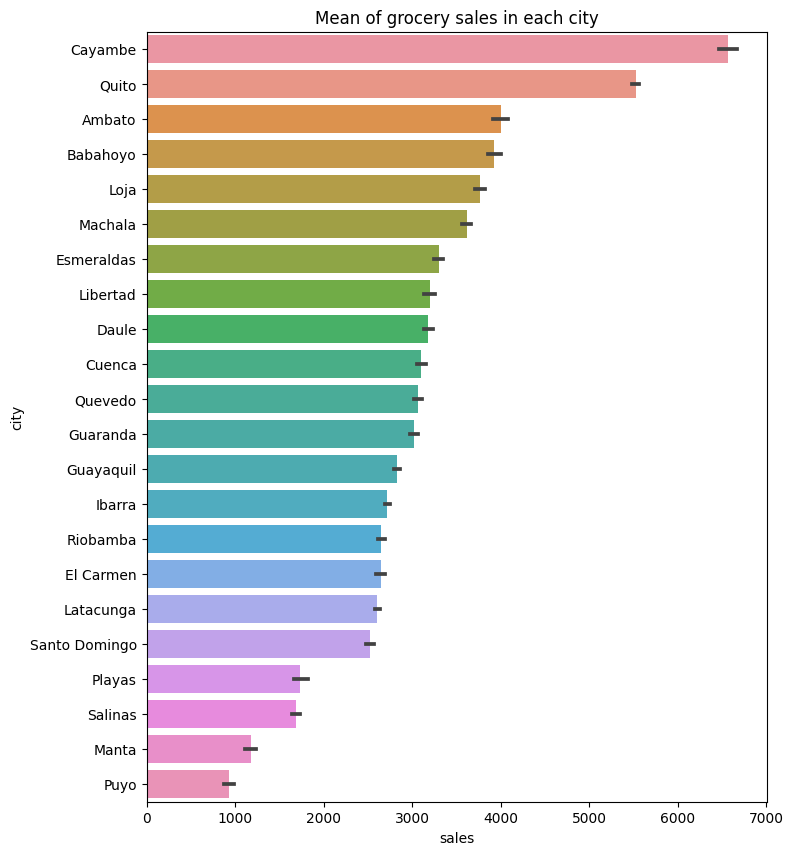

In [66]:
df_grocery = df[df['family']== 'GROCERY I']
plt.figure(figsize=(8,10))

sns.barplot(data= df_grocery, y='city', x='sales', order = df_grocery.groupby('city')['sales'].mean().sort_values(ascending=False).index)

plt.title("Mean of grocery sales in each city")

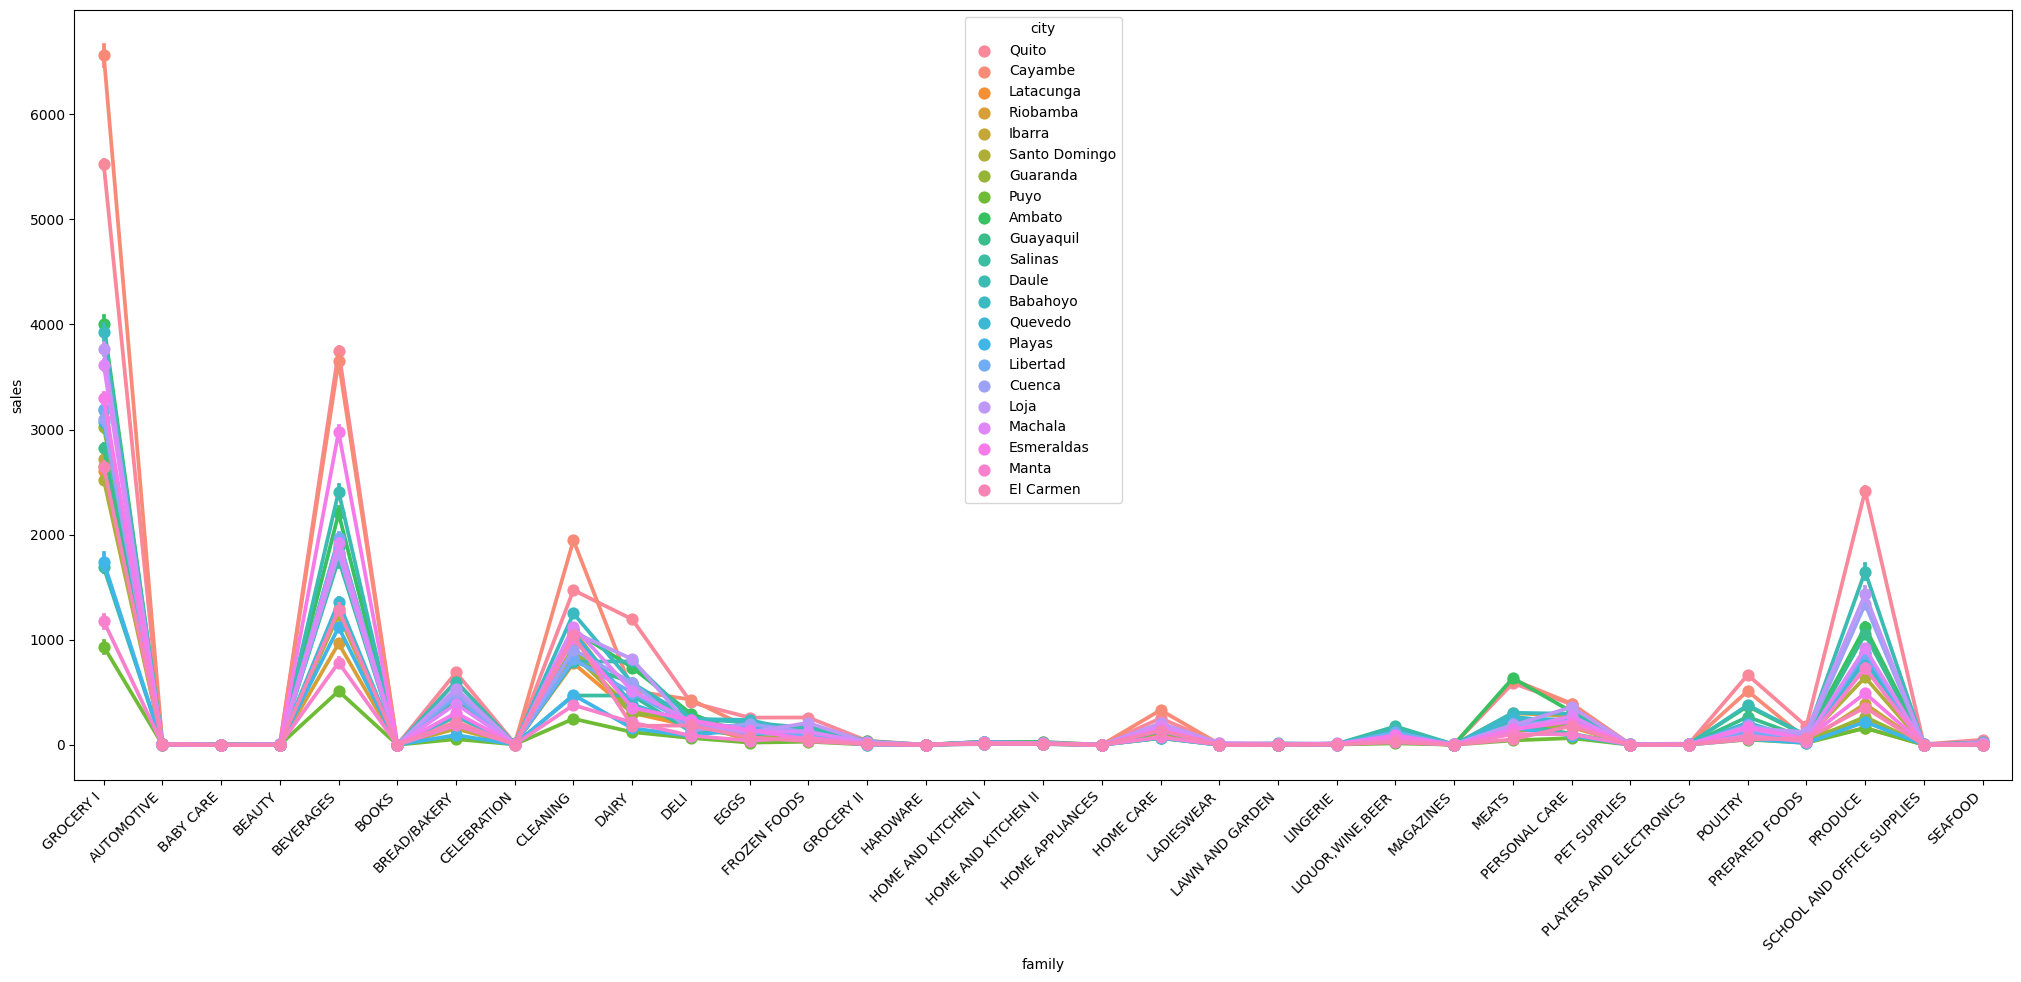

In [67]:
plt.figure( figsize = (25,10))
ax = sns.pointplot(data = df, x = "family", y= 'sales', hue = 'city', order = df_grocery.groupby('family')['sales'].mean().sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


In [68]:
result  = df_grocery.groupby(['family', 'city'])['sales'].mean().sort_values(ascending=False)
df_result = result.reset_index().rename(columns={'sales': 'mean_sales'})
df_result.head(30)

,family,city,mean_sales
0,GROCERY I,Cayambe,6567.329495
1,GROCERY I,Quito,5524.741747
2,GROCERY I,Ambato,4001.455064
3,GROCERY I,Babahoyo,3929.397282
4,GROCERY I,Loja,3765.004156
5,GROCERY I,Machala,3615.472757
6,GROCERY I,Esmeraldas,3299.902630
7,GROCERY I,Libertad,3196.592933
8,GROCERY I,Daule,3184.995261
9,GROCERY I,Cuenca,3104.636913


In [69]:
city = list(df.city.unique())

desc_print("The top- selling category in each city")

for c in city:
    result = df[df['city']== c]
    result = result.groupby("family")['sales'].sum().sort_values(ascending= False)
    desc_print(f"The 5-top family of products in {c}",result[:5])

--------------------------------------
The top- selling category in each city
--------------------------------------
-------------------------------------
The 5-top family of products in Quito
-------------------------------------
family
GROCERY I    1.678638e+08
BEVERAGES    1.139910e+08
PRODUCE      7.337649e+07
CLEANING     4.473651e+07
DAIRY        3.629945e+07
Name: sales, dtype: float64
---------------------------------------
The 5-top family of products in Cayambe
---------------------------------------
family
GROCERY I    1.108565e+07
BEVERAGES    6.163384e+06
CLEANING     3.285233e+06
PRODUCE      1.335911e+06
MEATS        1.047582e+06
Name: sales, dtype: float64
-----------------------------------------
The 5-top family of products in Latacunga
-----------------------------------------
family
GROCERY I    8806868.043
BEVERAGES    4376624.000
CLEANING     2620938.000
DAIRY        1022915.000
DELI          599894.000
Name: sales, dtype: float64
---------------------------------

In [70]:
# The top- selling category in each city:
city = list(df.city.unique())
dash = "-"*25
for c in city:
    print(f"The 5-top family of products in {c}:")
    print(dash)

    print(result[:5])


The 5-top family of products in Quito:
-------------------------
family
GROCERY I       4.466298e+06
BEVERAGES       2.173097e+06
CLEANING        1.757947e+06
PRODUCE         5.990354e+05
BREAD/BAKERY    3.690940e+05
Name: sales, dtype: float64
The 5-top family of products in Cayambe:
-------------------------
family
GROCERY I       4.466298e+06
BEVERAGES       2.173097e+06
CLEANING        1.757947e+06
PRODUCE         5.990354e+05
BREAD/BAKERY    3.690940e+05
Name: sales, dtype: float64
The 5-top family of products in Latacunga:
-------------------------
family
GROCERY I       4.466298e+06
BEVERAGES       2.173097e+06
CLEANING        1.757947e+06
PRODUCE         5.990354e+05
BREAD/BAKERY    3.690940e+05
Name: sales, dtype: float64
The 5-top family of products in Riobamba:
-------------------------
family
GROCERY I       4.466298e+06
BEVERAGES       2.173097e+06
CLEANING        1.757947e+06
PRODUCE         5.990354e+05
BREAD/BAKERY    3.690940e+05
Name: sales, dtype: float64
The 5-top f

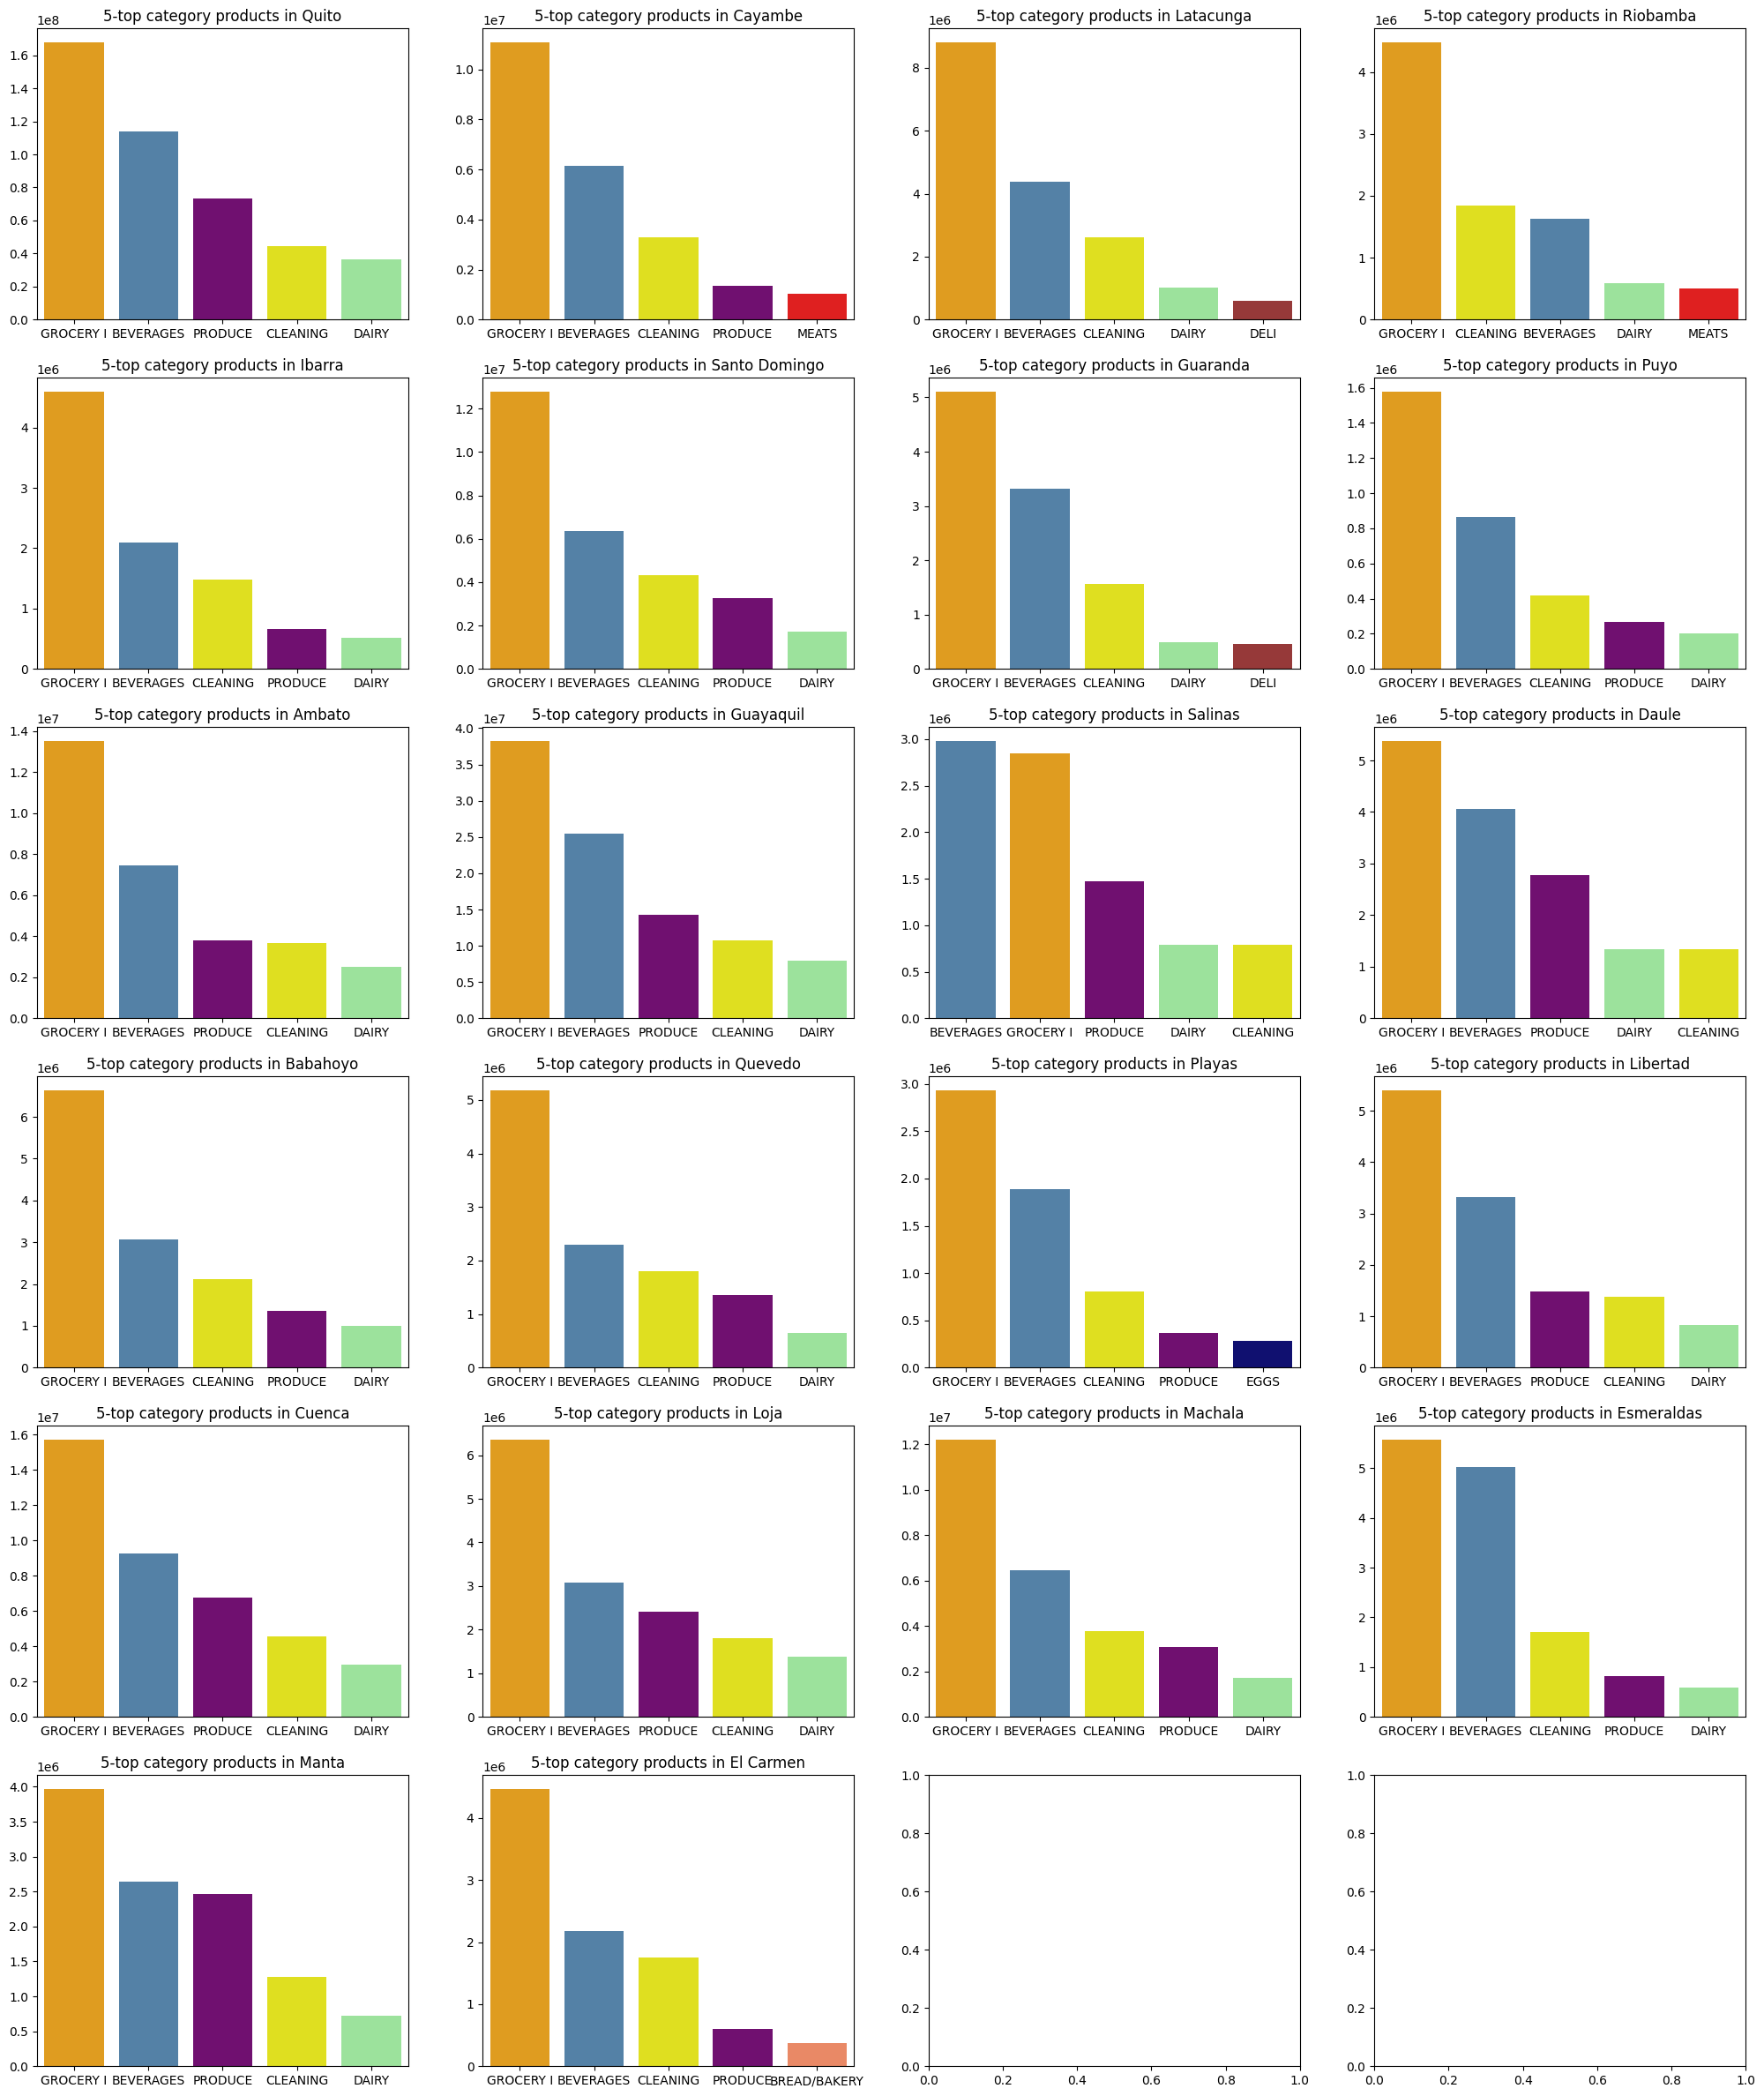

In [71]:
city = list(df.city.unique())

category_color = {
    "GROCERY I" : "orange",
    "BEVERAGES" : "steelblue",
    "CLEANING" : "yellow",
    "PRODUCE" : "purple",
    "MEATS" : "red",
    "DAIRY" : "lightgreen",
    "DELI" : 'brown',
    "EGGS": 'navy',
    'BREAD/BAKERY': "coral"
}

fig ,ax  = plt.subplots(6,4,figsize = (25, 30))
for i, c in enumerate(city):
    result = df[df['city']== c]
    result = result.groupby("family")['sales'].sum().sort_values(ascending= False)
    #colors = [category_color.get(fam) for fam in result.index[:5]]
    sns.barplot(x = list(result.index[:5]), y = list(result.values[:5]), ax = ax[i//4, i%4], palette=category_color)
    ax[i//4, i%4].set_title(f"5-top category products in {c}")


## The relationship between sales and onpromotion

In [72]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'city', 'state', 'type_store', 'cluster', 'type_holiday', 'locale',
       'transferred', 'year', 'month', 'day', 'dayweek', 'quarter', 'weekyear',
       'isweekend', 'season'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'GROCERY I'),
  Text(1, 0, 'PRODUCE'),
  Text(2, 0, 'BEVERAGES'),
  Text(3, 0, 'DAIRY'),
  Text(4, 0, 'CLEANING'),
  Text(5, 0, 'DELI'),
  Text(6, 0, 'BREAD/BAKERY'),
  Text(7, 0, 'MEATS'),
  Text(8, 0, 'PERSONAL CARE'),
  Text(9, 0, 'POULTRY'),
  Text(10, 0, 'HOME CARE'),
  Text(11, 0, 'EGGS'),
  Text(12, 0, 'FROZEN FOODS'),
  Text(13, 0, 'HOME AND KITCHEN I'),
  Text(14, 0, 'LIQUOR,WINE,BEER'),
  Text(15, 0, 'SEAFOOD'),
  Text(16, 0, 'PREPARED FOODS'),
  Text(17, 0, 'HOME AND KITCHEN II'),
  Text(18, 0, 'SCHOOL AND OFFICE SUPPLIES'),
  Text(19, 0, 'BEAUTY'),
  Text(20, 0, 'LAWN AND GARDEN'),
  Text(21, 0, 'GROCERY II'),
  Text(22, 0, 'CELEBRATION'),
  Text(23, 0, 'AUTOMOTIVE'),
  Text(24, 0, 'PET SUPPLIES'),
  Text(25, 0, 'LINGERIE'),
  Text(26, 0, 'PLAYERS AND ELECTRONICS'),
  Text(27, 0, 'LADIESWEAR'),
  Text(28, 0, 'MAGA

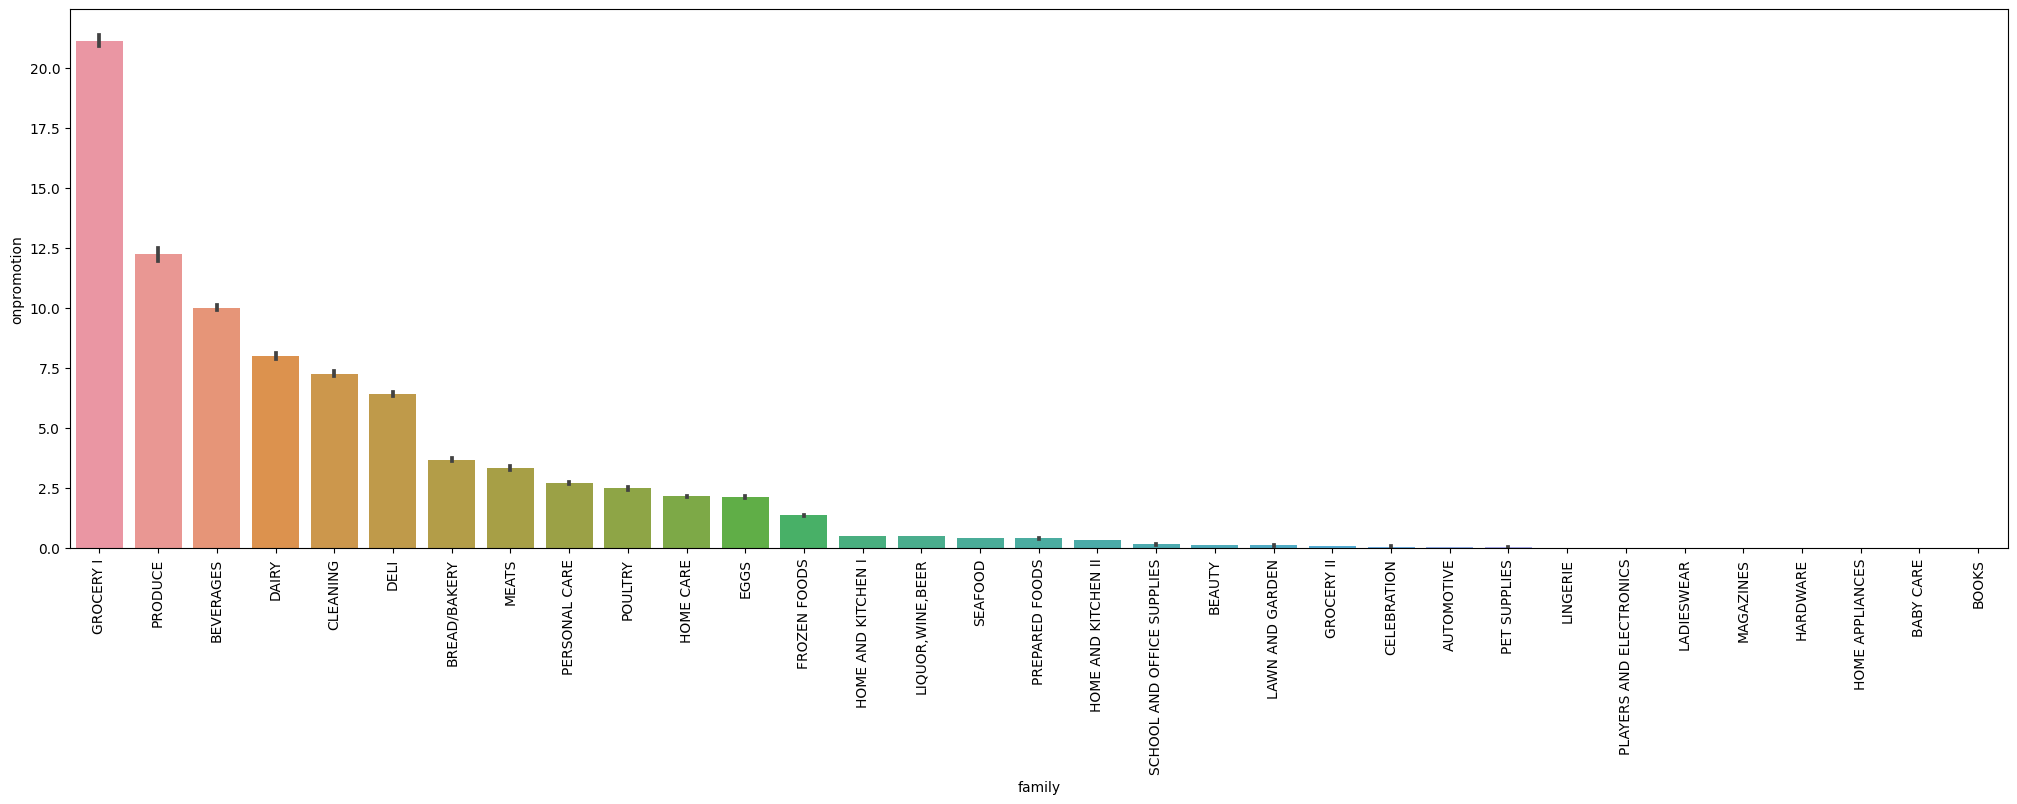

In [73]:
plt.figure(figsize=(25,7))

df.groupby(['family'])['onpromotion'].mean().sort_values(ascending= False).index

sns.barplot(data = df, x = 'family', y = 'onpromotion', order = df.groupby(['family'])['onpromotion'].mean().sort_values(ascending= False).index)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Relationship between sales and number of items on promotions')

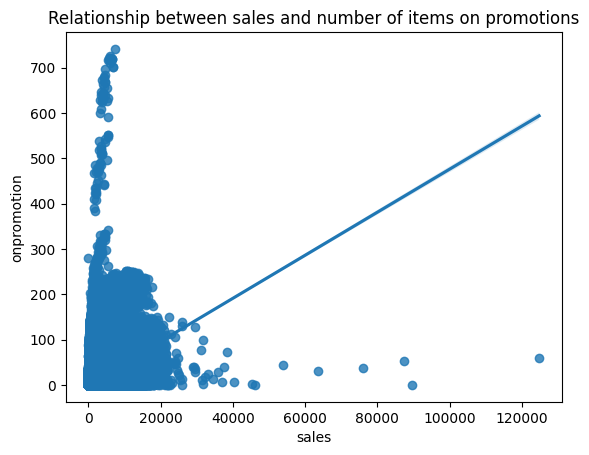

In [74]:
sns.regplot(data = df, x = 'sales', y = 'onpromotion')
plt.title("Relationship between sales and number of items on promotions")


<AxesSubplot: xlabel='sales', ylabel='onpromotion'>

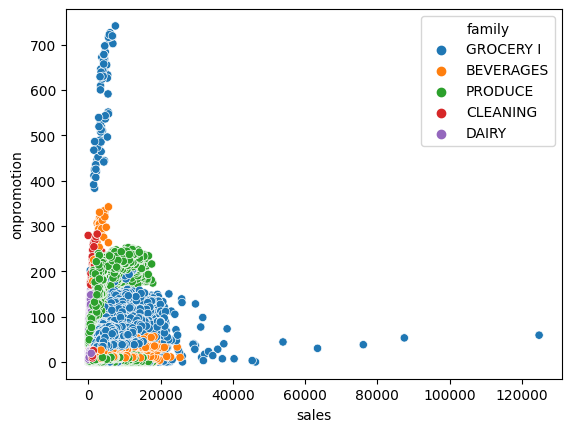

In [75]:
top5cat= list(df.groupby("family")['sales'].sum().sort_values(ascending= False).index[:5])


result = df[df['family'].isin(top5cat)]

sns.scatterplot(data = result, x = 'sales', y = 'onpromotion', hue = 'family', hue_order=top5cat)

## stores and promotion and sales

Text(0.5, 1.0, 'Distribution of onpromotion items')

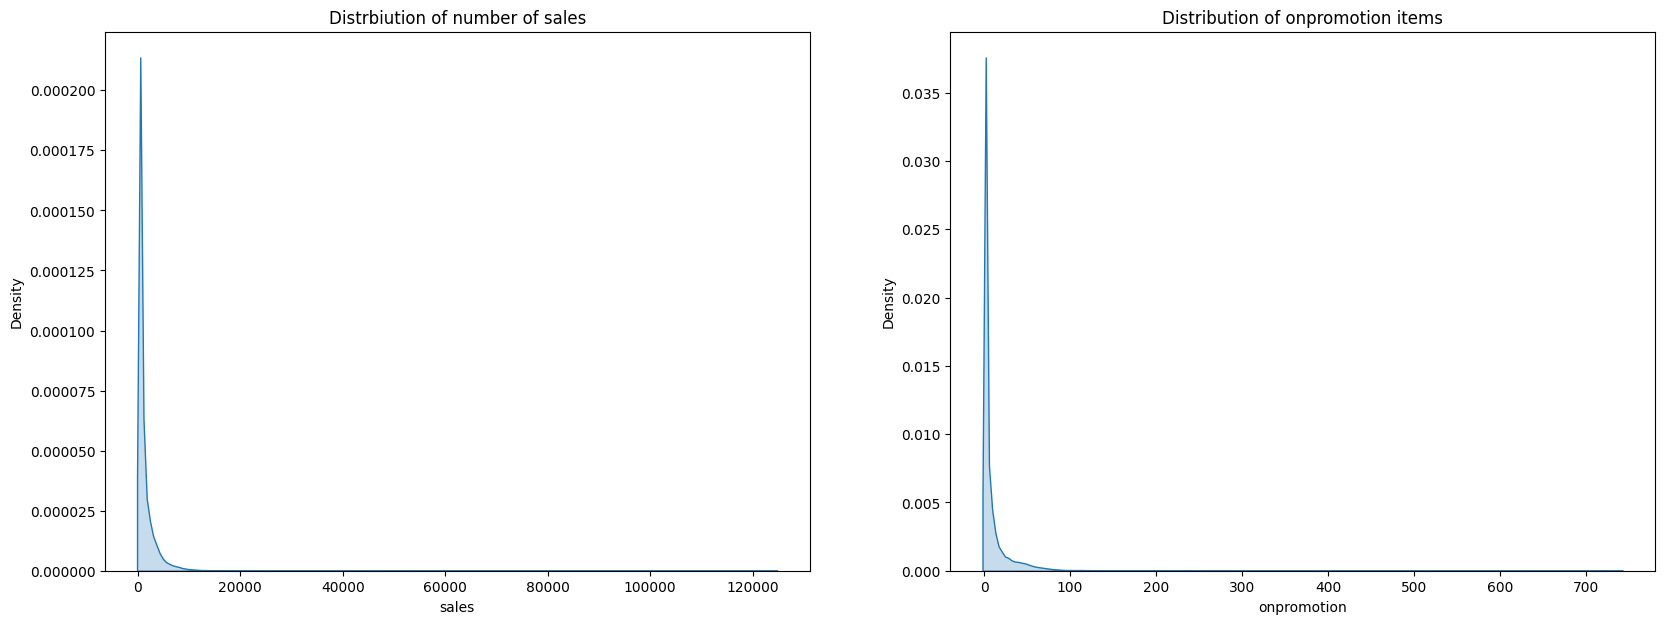

In [76]:
fig , ax = plt.subplots(1,2, figsize = (20, 7))
sns.kdeplot(data = df, x = "sales", fill = True, ax = ax[0])
ax[0].set_title("Distrbiution of number of sales")

sns.kdeplot(data = df, x = "onpromotion", fill = True, ax = ax[1])
ax[1].set_title("Distribution of onpromotion items")

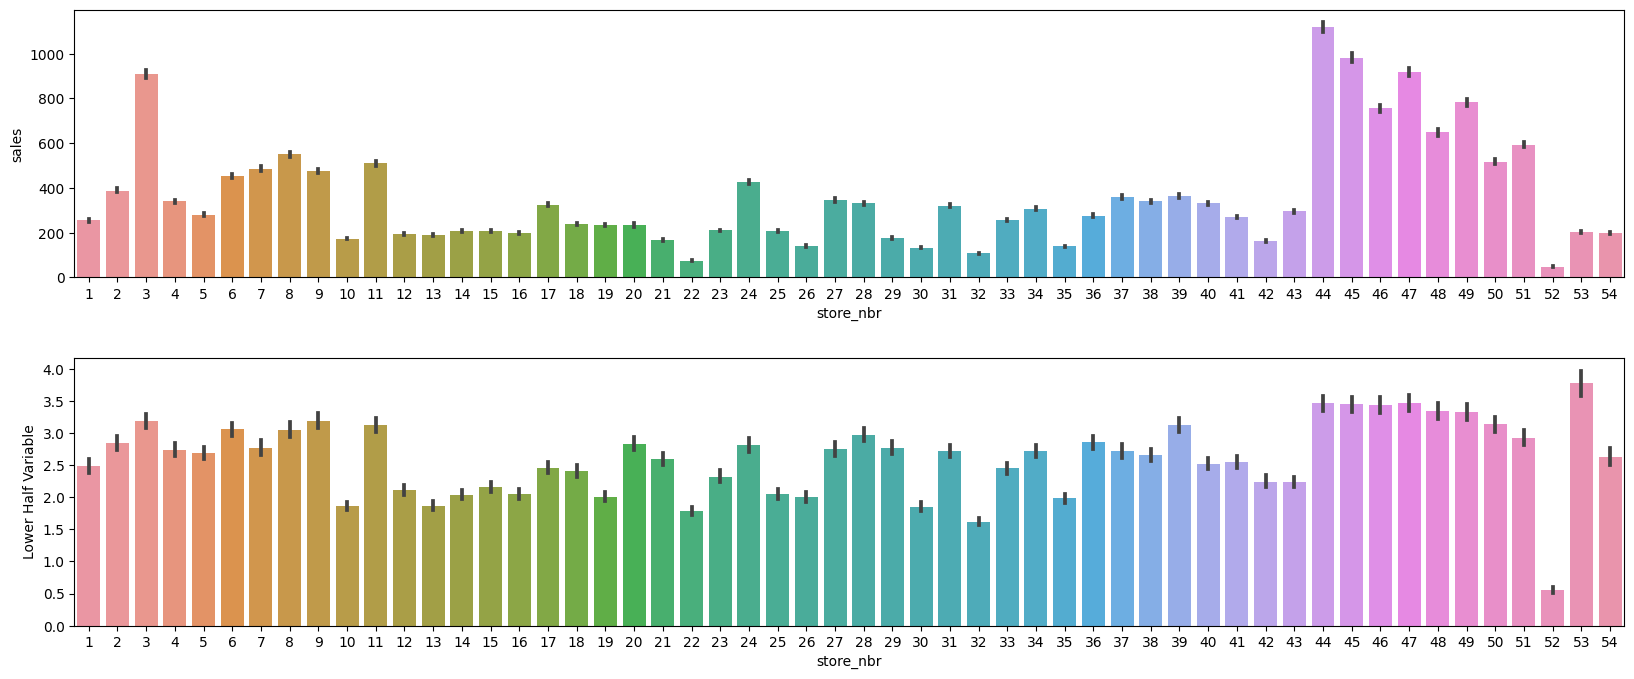

In [77]:


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Plot the upper half bar chart
sns.barplot(data = df, x='store_nbr', y='sales', ax=ax1)
ax1.set_ylabel('sales')

# Plot the lower half bar chart
sns.barplot(data = df, x='store_nbr', y='onpromotion', ax=ax2)
ax2.set_ylabel('Lower Half Variable')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Show the plot
plt.show()

## city and state

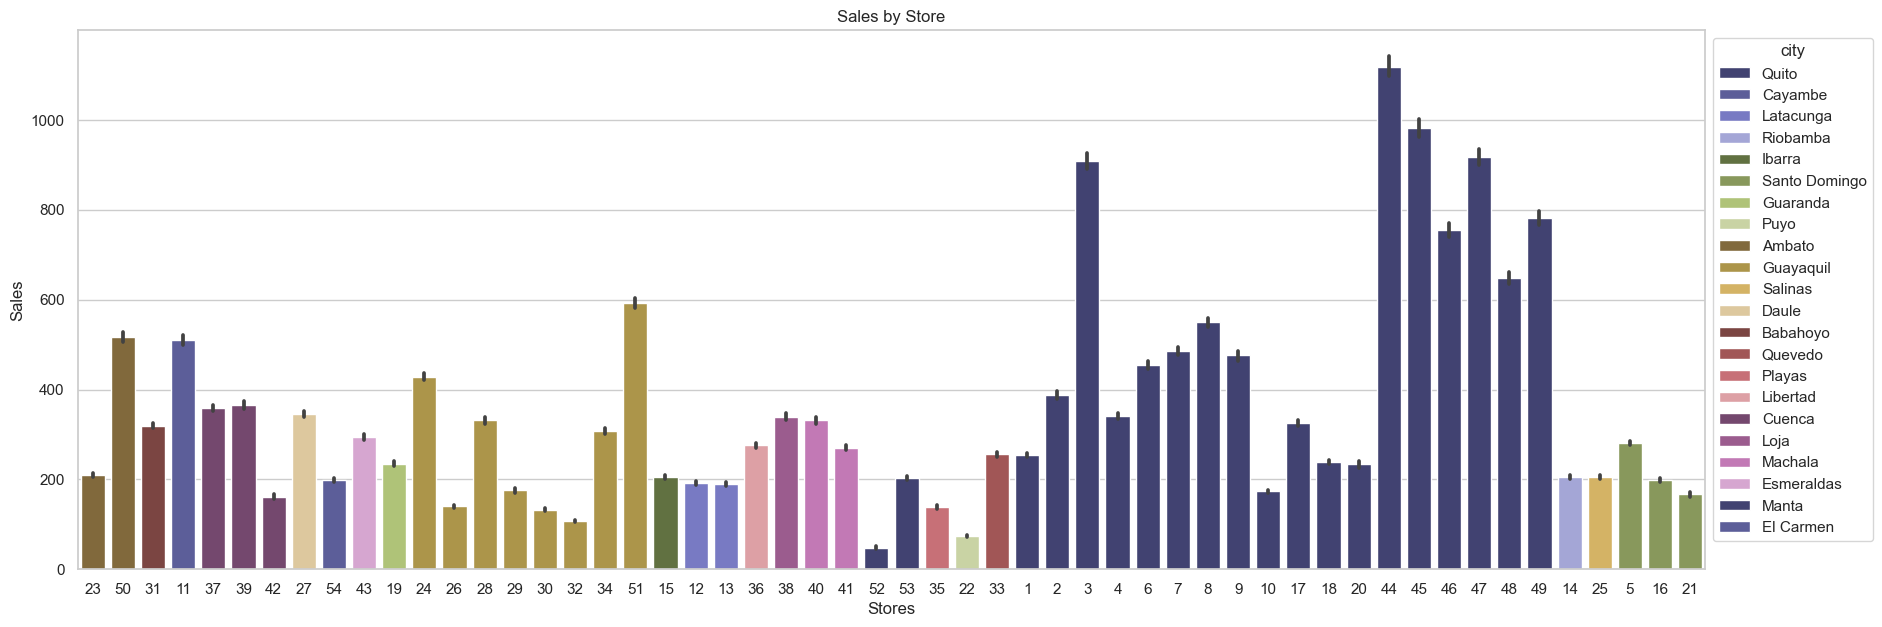

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(21, 7))
n_city = df["city"].nunique()


city_colors = {city: color for city, color in zip(df['city'].unique(), sns.color_palette("tab20b", n_colors=n_city))}

# Create a list of stores where stores in a unique city are near each other:
df_city = df.groupby("city")["store_nbr"].unique()
order_stores = []
for i in range(n_city):
    tmp = list(df_city.values[i])
    tmp.sort()
    order_stores  = order_stores + tmp

sns.barplot(data=df, x='store_nbr', y='sales', hue='city', dodge=False, palette= city_colors, order = order_stores )

plt.title("Sales by Store")
plt.xlabel("Stores")
plt.ylabel("Sales")
# Move the legend outside the plot and adjust its position
plt.legend(title='city', loc='upper left', bbox_to_anchor=(1, 1))

#plt.tight_layout()

plt.show()


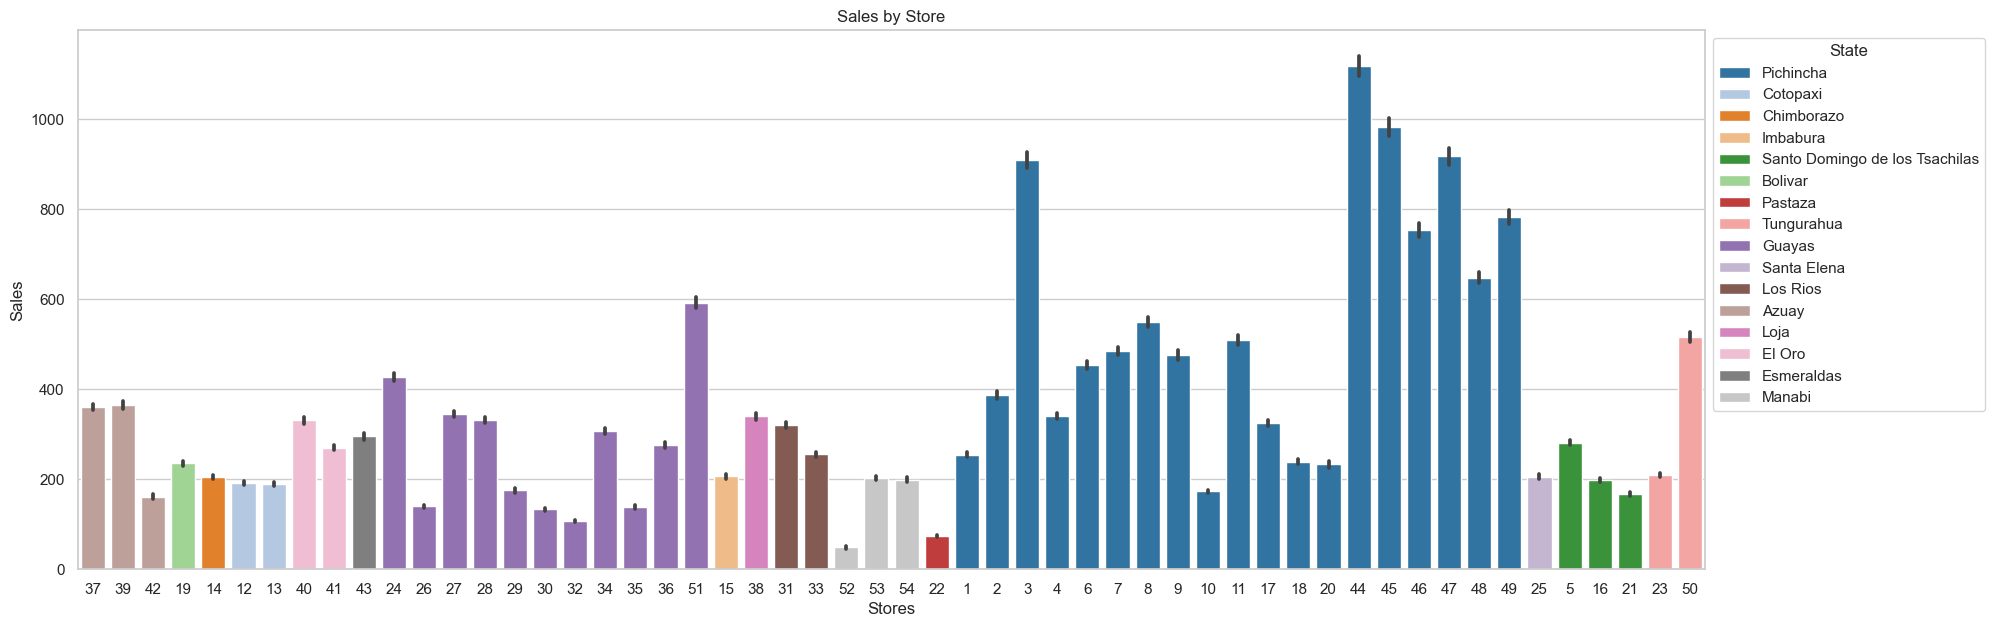

In [79]:
sns.set(style="whitegrid")
plt.figure(figsize=(21, 7))
n_state = df["state"].nunique()


state_colors = {state: color for state, color in zip(df['state'].unique(), sns.color_palette("tab20", n_colors=n_state))}

# Create a list of stores where stores in a unique state are near each other:
df_state = df.groupby("state")["store_nbr"].unique()
order_stores = []
for i in range(n_state):
    tmp = list(df_state.values[i])
    tmp.sort()
    order_stores  = order_stores + tmp

sns.barplot(data=df, x='store_nbr', y='sales', hue='state', dodge=False, palette= state_colors, order = order_stores )

plt.title("Sales by Store")
plt.xlabel("Stores")
plt.ylabel("Sales")
# Move the legend outside the plot and adjust its position
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))

#plt.tight_layout()

plt.show()

## Type_store and cluster

In [80]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'city', 'state', 'type_store', 'cluster', 'type_holiday', 'locale',
       'transferred', 'year', 'month', 'day', 'dayweek', 'quarter', 'weekyear',
       'isweekend', 'season'],
      dtype='object')

Text(0.5, 1.0, 'Frequency of each store type')

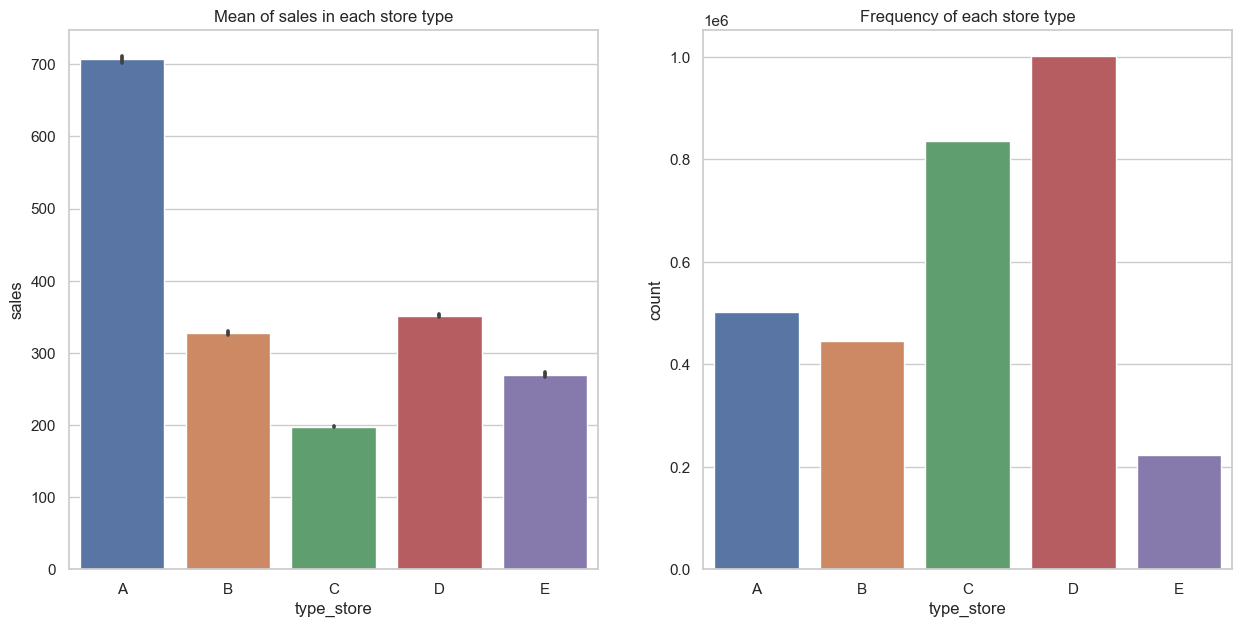

In [81]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.barplot(data =df, x = 'type_store', y= 'sales', ax = ax[0])
ax[0].set_title("Mean of sales in each store type")

sns.countplot(data =df, x = 'type_store', ax= ax[1])
ax[1].set_title("Frequency of each store type")

<AxesSubplot: xlabel='cluster', ylabel='sales'>

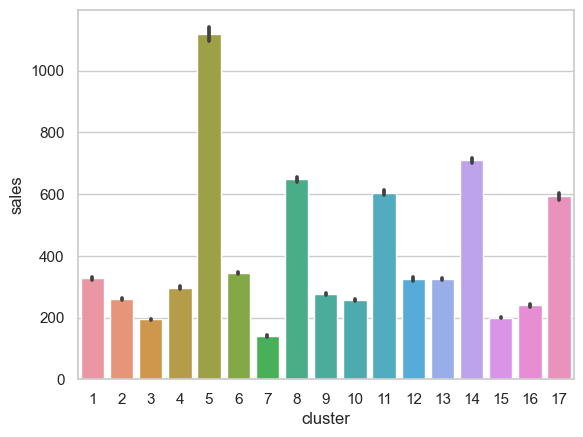

In [82]:
sns.barplot(data =df, x= 'cluster', y= 'sales')

In [83]:
df_typestore_cluster = df.groupby(['type_store', 'cluster'])['sales'].mean().reset_index()

df_typestore_cluster.dropna(inplace= True)

df_typestore_cluster

,type_store,cluster,sales
4,A,5,1118.625118
10,A,11,604.310280
13,A,14,709.437310
16,A,17,592.971183
22,B,6,343.230504
26,B,10,319.895335
32,B,16,238.949623
36,C,3,194.603505
40,C,7,139.460337
45,C,12,325.019167


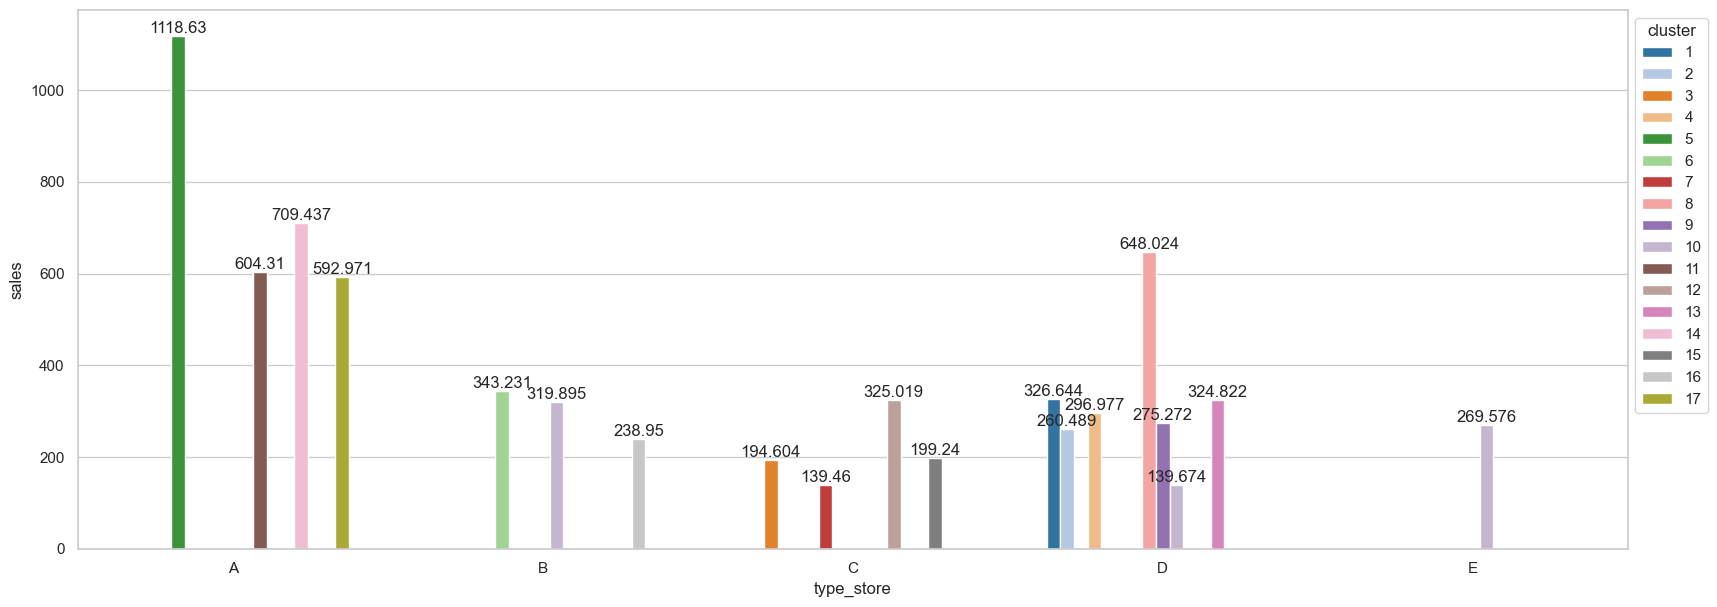

In [84]:
plt.figure(figsize = (20,7))

df_type_cluster = df.groupby(['type_store', 'cluster'])['sales'].mean().reset_index()
df_type_cluster.dropna(inplace= True)

ax = sns.barplot(data = df_type_cluster, x = 'type_store', y= 'sales', hue = 'cluster', width = .75, palette = "tab20" )


for container in ax.containers: 
    ax.bar_label(container)


plt.legend(title='cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

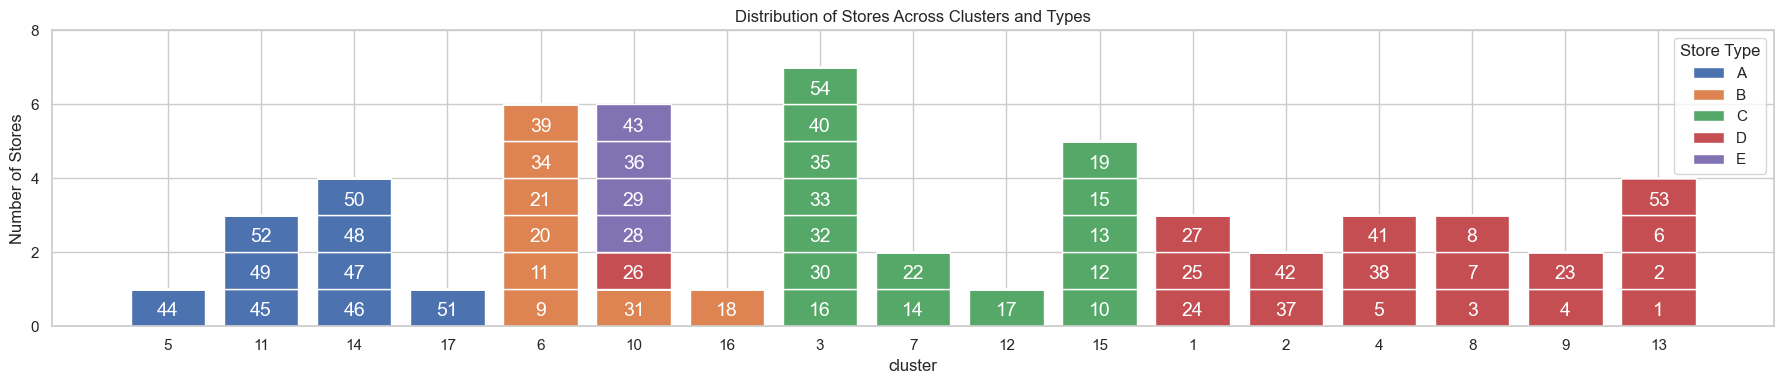

In [85]:
COLORS = list(sns.color_palette())
store = stores_data.copy().sort_values(["type", "cluster"])
cluster_list = store.cluster.unique().astype(str)
type_list = store.type.sort_values().unique()
bar_bottom = np.zeros(len(cluster_list))
color_map = {s_type: c for s_type, c in zip(type_list, COLORS)}

fig = plt.figure(figsize=(18, 4))

for num in store.store_nbr.unique():
    #extract cluster and type of cluster store num
    curr_cluster, curr_type = store.loc[store.store_nbr.eq(num), ["cluster", "type"]].astype(str).values[0]
    cluster_ind = (cluster_list==curr_cluster).astype(int)
    plt.bar(
        x=cluster_list, height=cluster_ind,
        bottom=bar_bottom,
        zorder=2,
        color=color_map[curr_type],
        label=curr_type,
        edgecolor="white",
    )
    bar_bottom += cluster_ind
    running_total = bar_bottom[np.argmax(cluster_ind)]
    plt.text(
        x=curr_cluster, y=running_total-0.6,
        s=num,
        size=14,
        color="white",
        va="center",
        ha="center",
    )
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(list(set(labels)))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels, title="Store Type")
plt.xlabel("cluster")
plt.ylabel("Number of Stores")
plt.yticks(list(range(0, 9, 2)))
plt.title("Distribution of Stores Across Clusters and Types")

plt.tight_layout()
plt.show()

## City and state

<AxesSubplot: xlabel='city', ylabel='sales'>

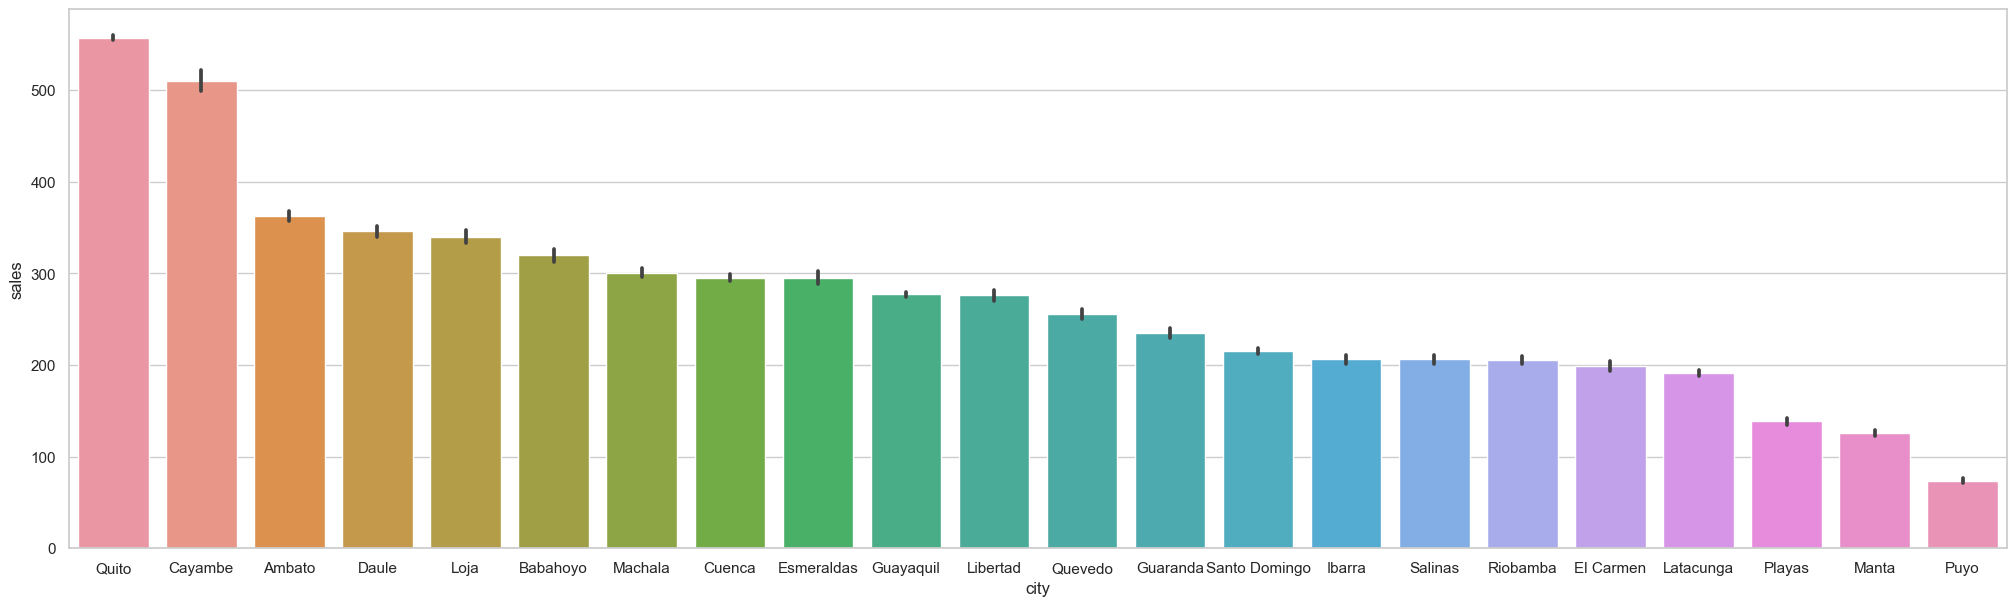

In [86]:
plt.figure(figsize = (25,7))

sns.barplot(data = df, x = "city", y = "sales", order = df.groupby("city")["sales"].mean().sort_values(ascending= False).index)

## Holiday and its types

In [87]:
df.type_holiday.value_counts()

IsNotHoliday    2733291
Event             99528
Holiday           93192
Additional        55242
Transfer          12837
Work Day           8844
Bridge             5346
Name: type_holiday, dtype: int64

In [88]:
len(df[df["type_holiday"]== "IsNotHoliday" ])/df.shape[0]

0.9085892935498026

<AxesSubplot: xlabel='type_holiday', ylabel='sales'>

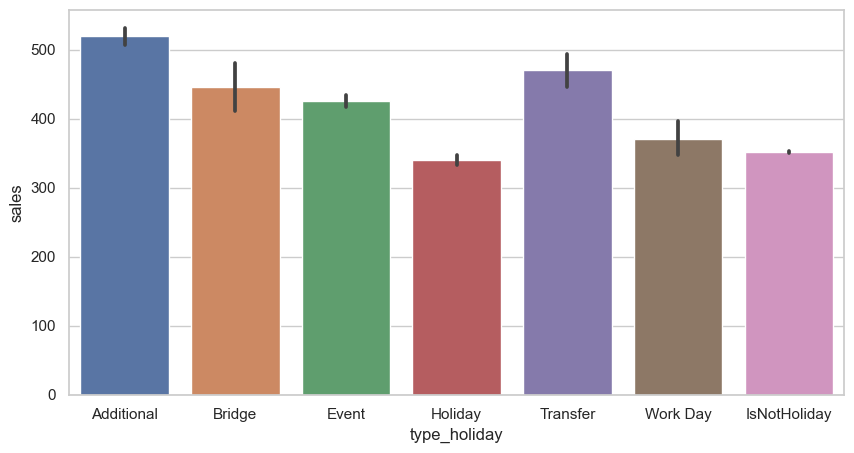

In [89]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "type_holiday", y = "sales")

Text(0.5, 1.0, 'Mean of sales with respect to type of holiday')

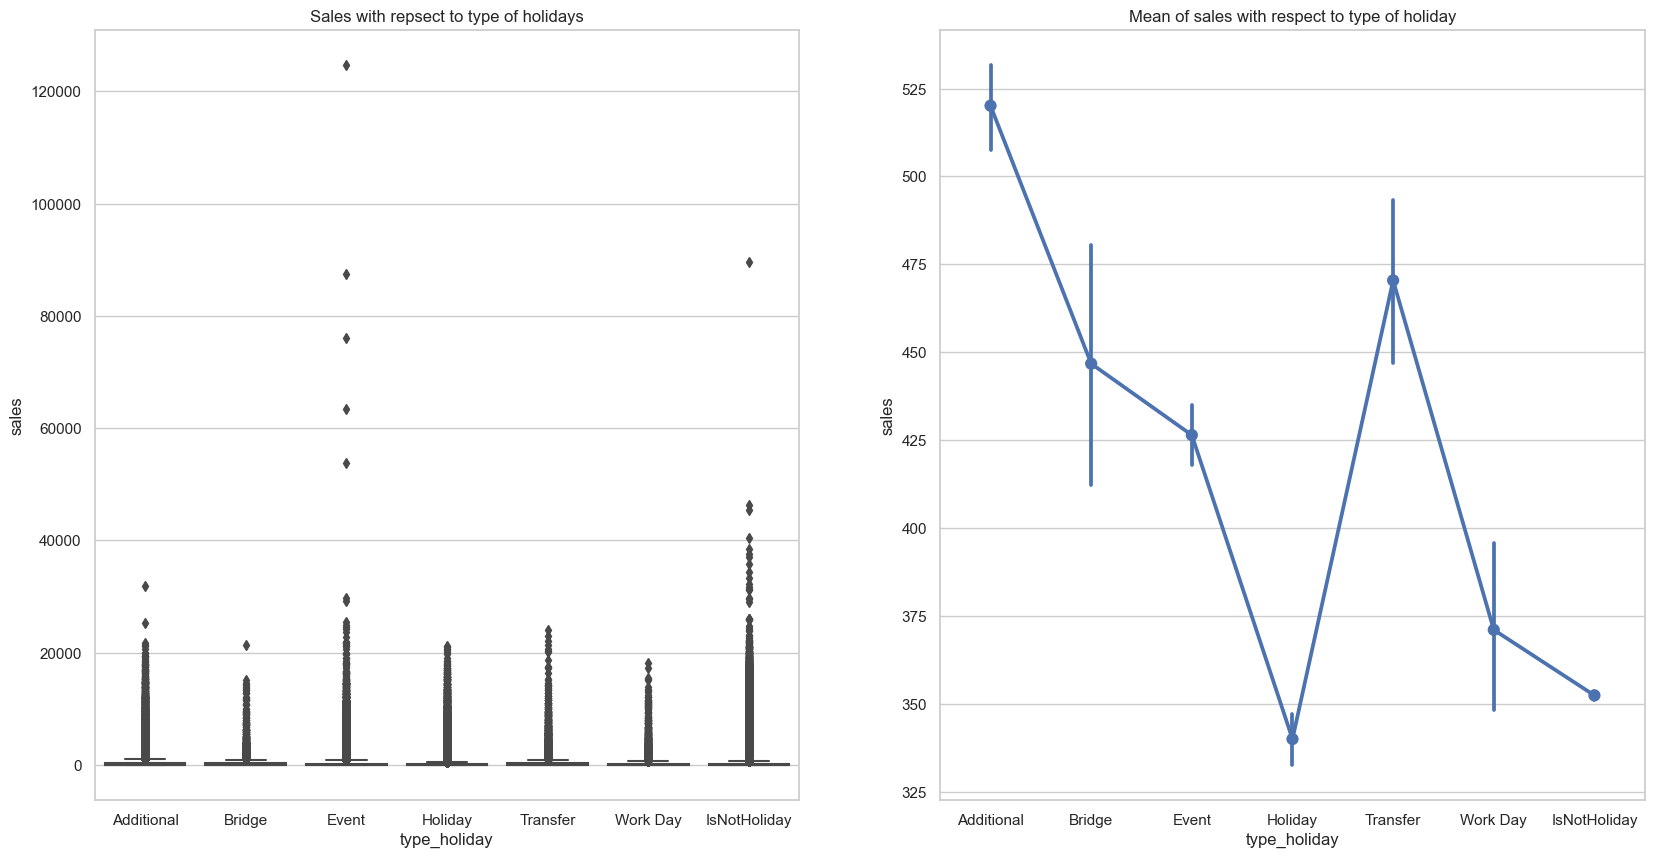

In [90]:
fig , ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data = df, x = 'type_holiday', y= 'sales', ax = ax[0], whis = 2.5)
ax[0].set_title('Sales with repsect to type of holidays')

sns.pointplot(data = df, x = 'type_holiday', y= 'sales', ax = ax[1])
ax[1].set_title("Mean of sales with respect to type of holiday")

Text(0.5, 1.0, 'Mean of sales with respect to type of holiday')

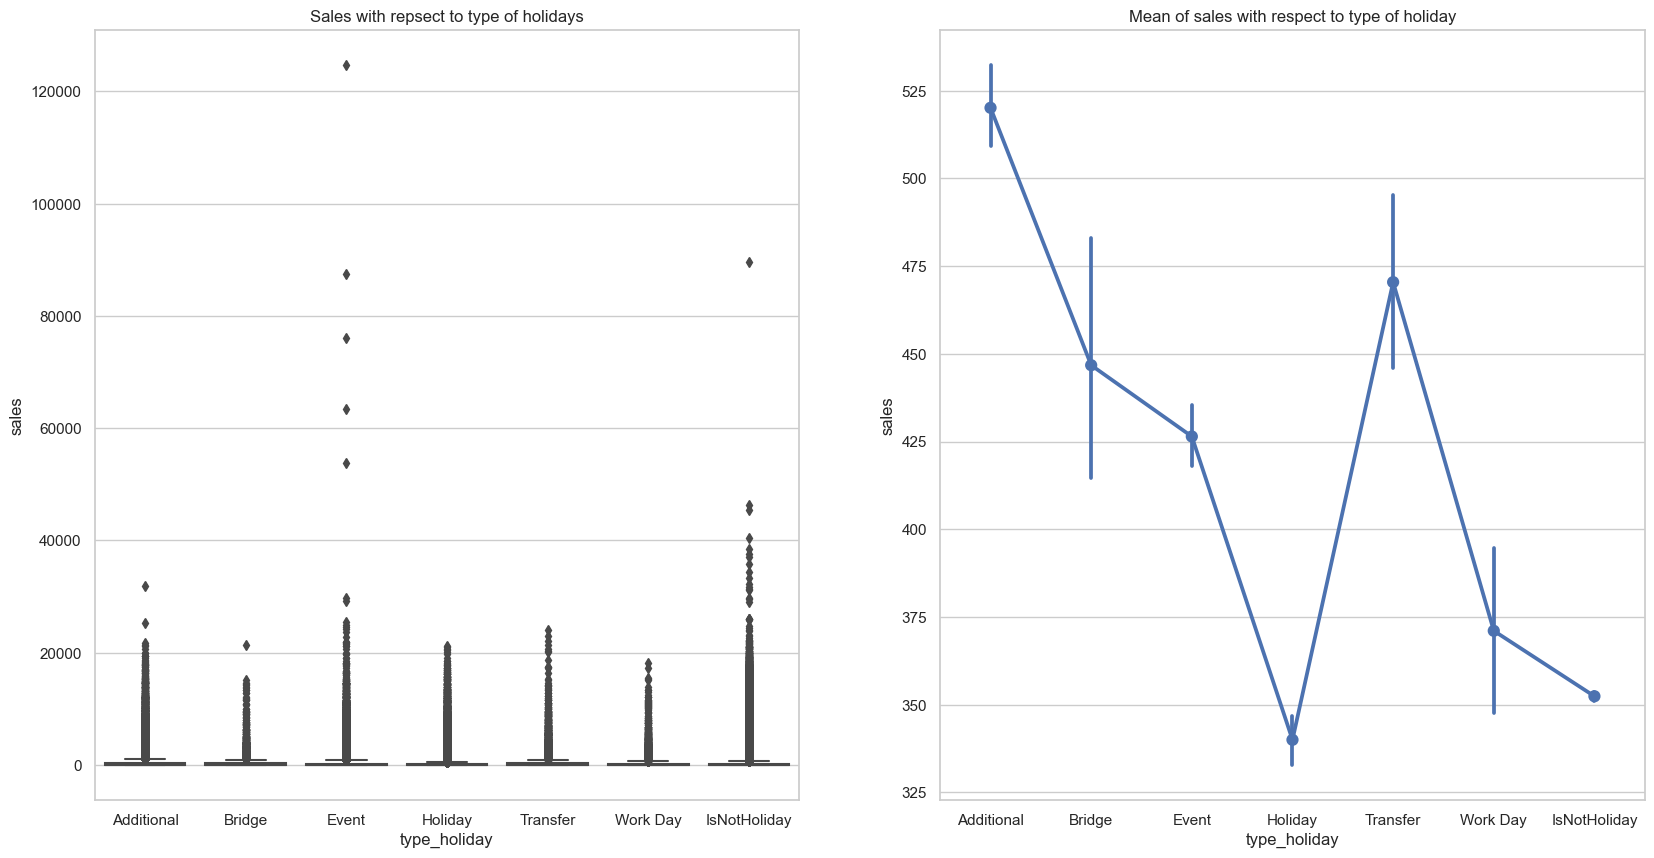

In [91]:
fig , ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(data = df, x = 'type_holiday', y= 'sales', ax = ax[0], whis = 2.5)
ax[0].set_title('Sales with repsect to type of holidays')

sns.pointplot(data = df, x = 'type_holiday', y= 'sales', ax = ax[1])
ax[1].set_title("Mean of sales with respect to type of holiday")

<AxesSubplot: xlabel='type_holiday', ylabel='sales'>

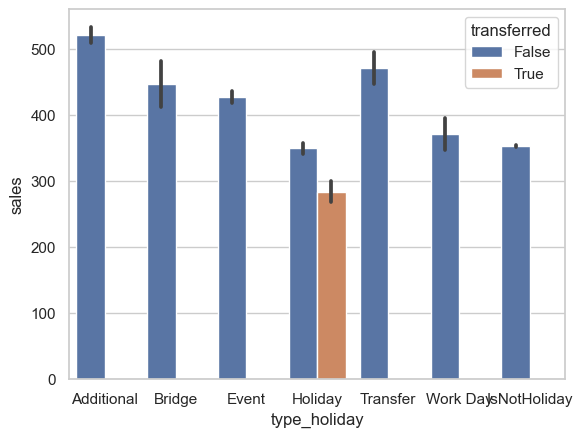

In [92]:
sns.barplot(data = df, x = 'type_holiday', y = 'sales', hue = "transferred")

In [93]:
df[(df["type_holiday"] != 'Holiday' )& (df["transferred"] == True)]

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,...,locale,transferred,year,month,day,dayweek,quarter,weekyear,isweekend,season
